In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [54]:
train = pd.read_csv('cleaned_train.csv')
train.shape

(1161, 80)

In [55]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL         68.0     4928   Pave  none      IR1   
1          20       RL         95.0    15865   Pave  none      IR1   
2          60       RL         92.0     9920   Pave  none      IR1   
3          20       RL        105.0    11751   Pave  none      IR1   
4          20       RL         65.0    16635   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1 

In [57]:
#extracting different types of variables
numerical_variables = []
for i in train.columns:
    if train[i].dtypes != 'O':
        numerical_variables.append(i)

In [58]:
print(numerical_variables)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [59]:
print("There are {} numerical variables in our train data".format(len(numerical_variables)))

There are 37 numerical variables in our train data


In [60]:
train[numerical_variables].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         68.0     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20         65.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

# YEAR TYPE VARIABLES

In [61]:
# we can see that there are some year related features in our numerical data set, I will extract and analyze them
year_features = []

for i in numerical_variables:
    if 'Yr' in i or 'Year' in i:
        year_features.append(i)

In [62]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

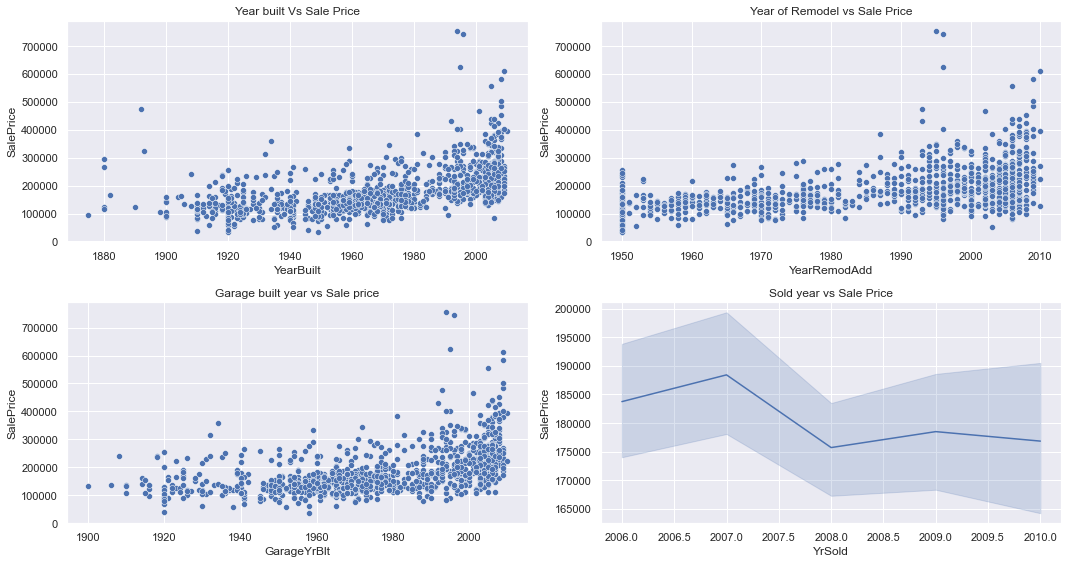

In [63]:
fig,ax = plt.subplots(2,2,figsize=(15,8))

sns.scatterplot(train['YearBuilt'],train['SalePrice'],ax=ax[0,0])
ax[0,0].set_title("Year built Vs Sale Price")

sns.scatterplot(train['YearRemodAdd'],train['SalePrice'],ax=ax[0,1])
ax[0,1].set_title("Year of Remodel vs Sale Price")

sns.scatterplot(train['GarageYrBlt'],train['SalePrice'],ax=ax[1,0])
ax[1,0].set_title("Garage built year vs Sale price")

sns.lineplot(train['YrSold'],train['SalePrice'],ax=ax[1,1])
ax[1,1].set_title("Sold year vs Sale Price")
fig.tight_layout()
plt.show()

Here we can see the relation as the house or any thing in house like garage or remodel, as new it is higher the Price.
old house, old remodelling, old garage built having low price

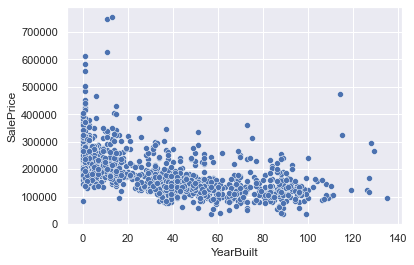

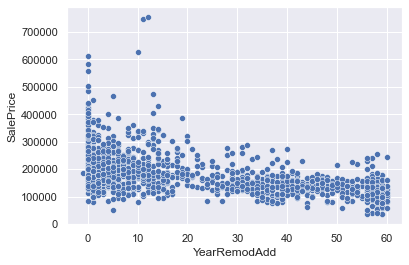

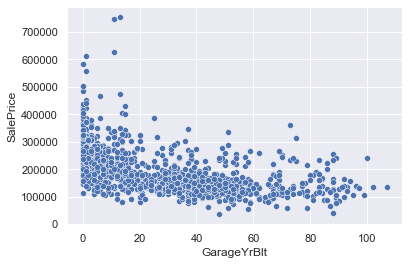

In [64]:
#I will now extract some features from these year related features
#I will find the number of years since there was any change or the house was built and then compare with the Sale Price

for i in year_features:
    if i != 'YrSold':
        train_new = train.copy()
        
        train_new[i] = train_new['YrSold'] - train_new[i]
        
        sns.scatterplot(train_new[i],train_new['SalePrice'])
        plt.show()

above plots shows that as the house or time of last remodel is getting high the Sale price reduces. New House tends to have a high price as we can see on the above plots


# Discrete Numerical Type variables

In [65]:
#Analyzing descrete numerical variables
desc_num_variables = []

for i in numerical_variables:
    if len(train[i].unique())<25:
        desc_num_variables.append(i)

In [66]:
print(desc_num_variables)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [67]:
#creating a function to plot boxplot for all the categorical variables
def box_plot(x,y):
    sns.set(style="ticks")
    sns.set_style("darkgrid")
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x,y=y,data=train,order=train.groupby(i)['SalePrice'].median().sort_values(ascending=True).index)
    plt.title("{} VS {}".format(x,y))
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()
    print('='*120)

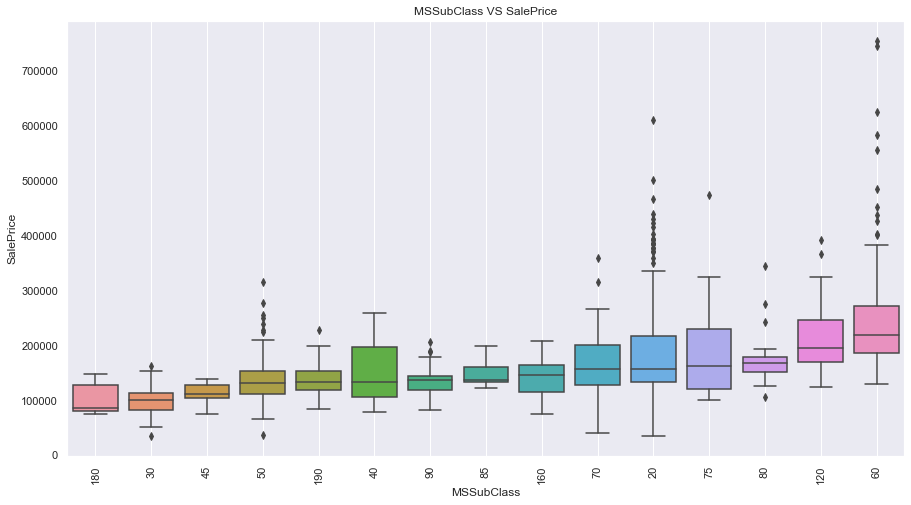

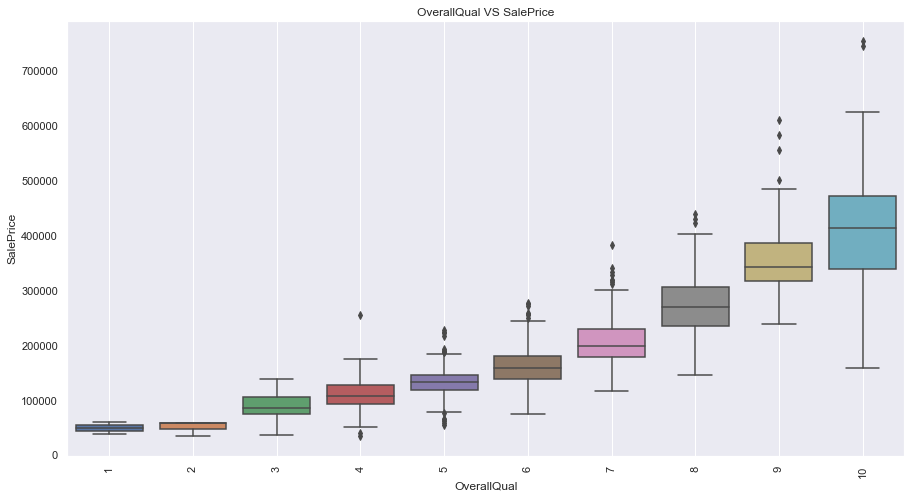

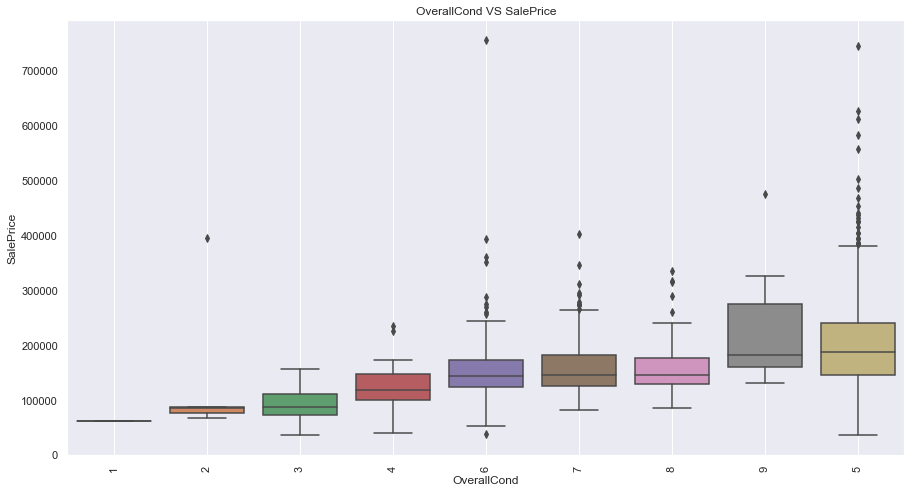

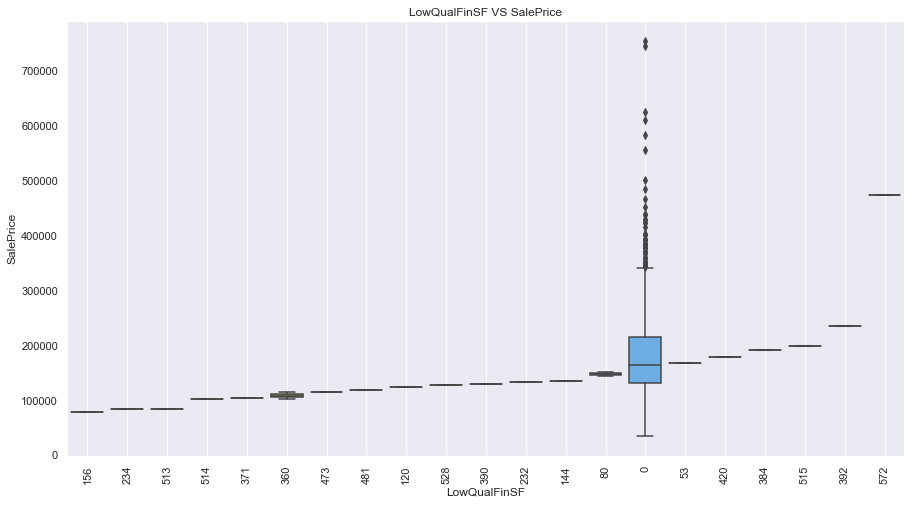

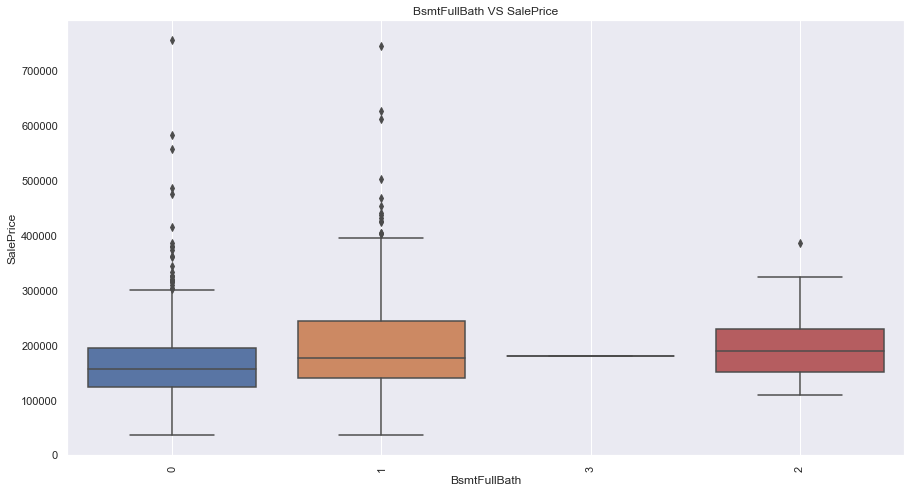

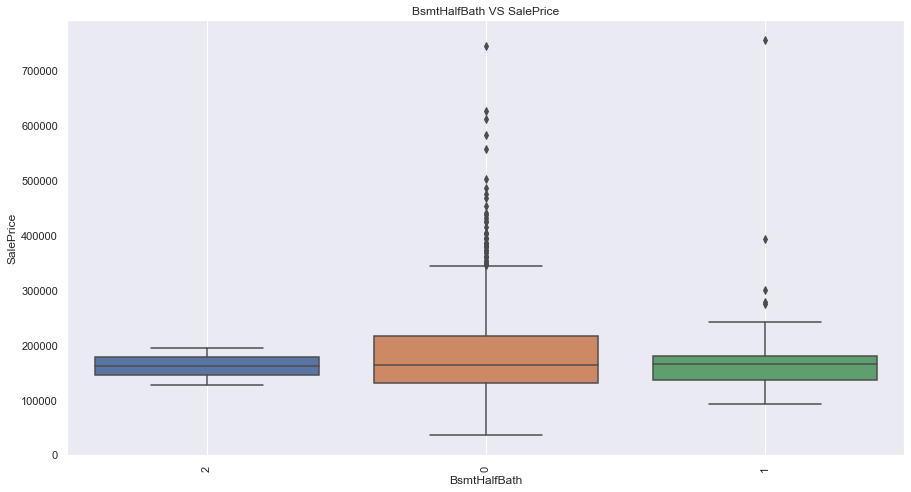

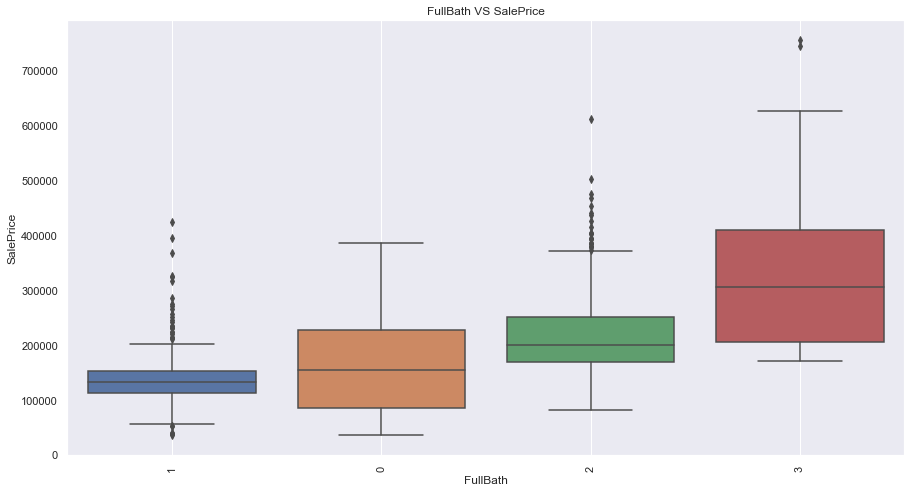

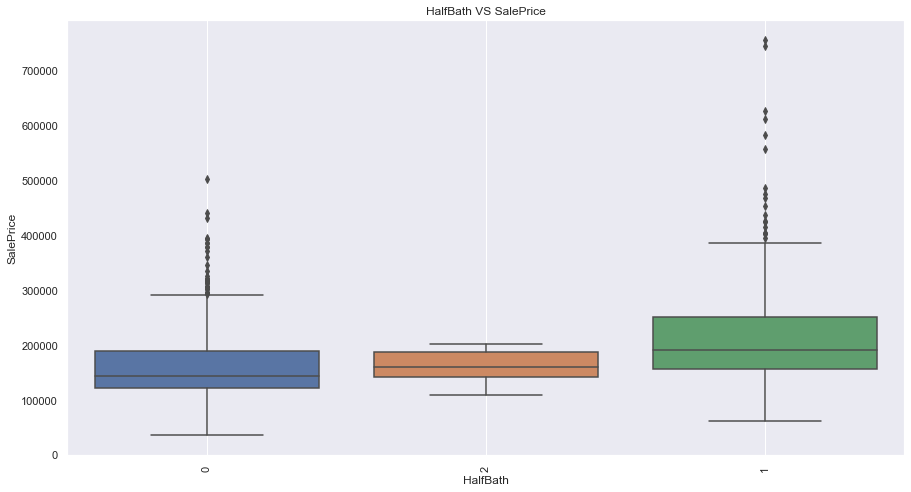

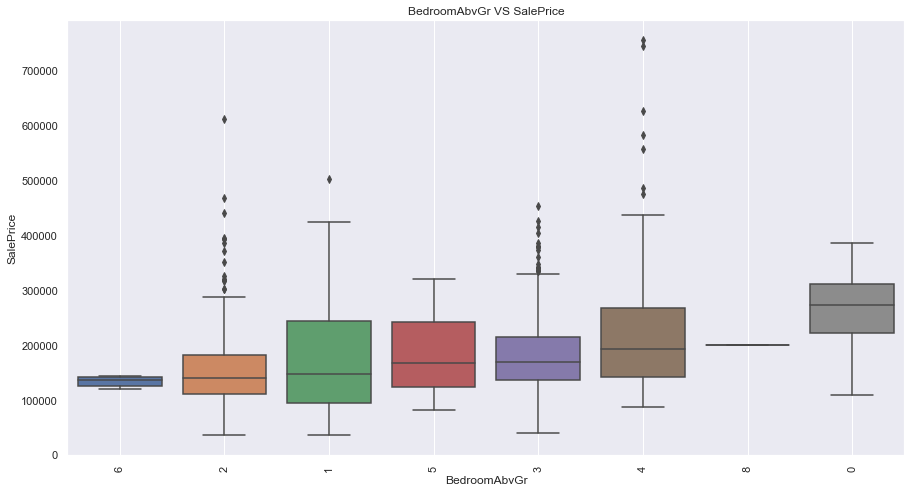

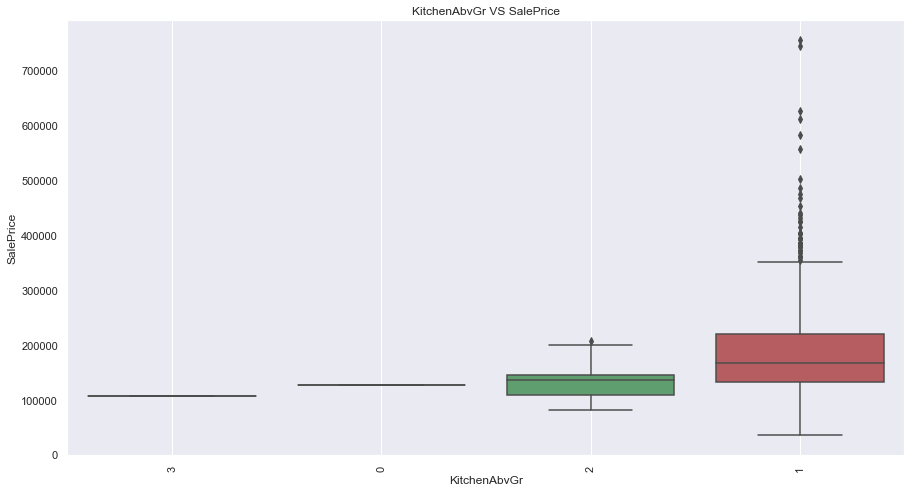

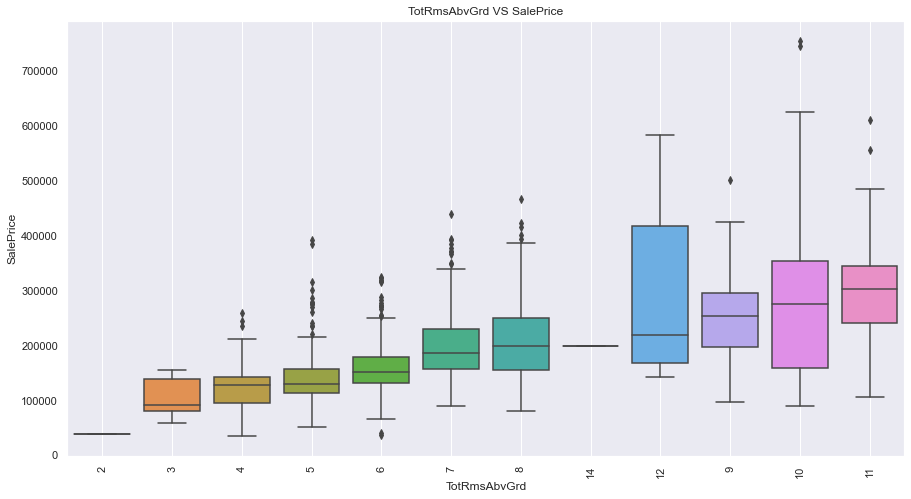

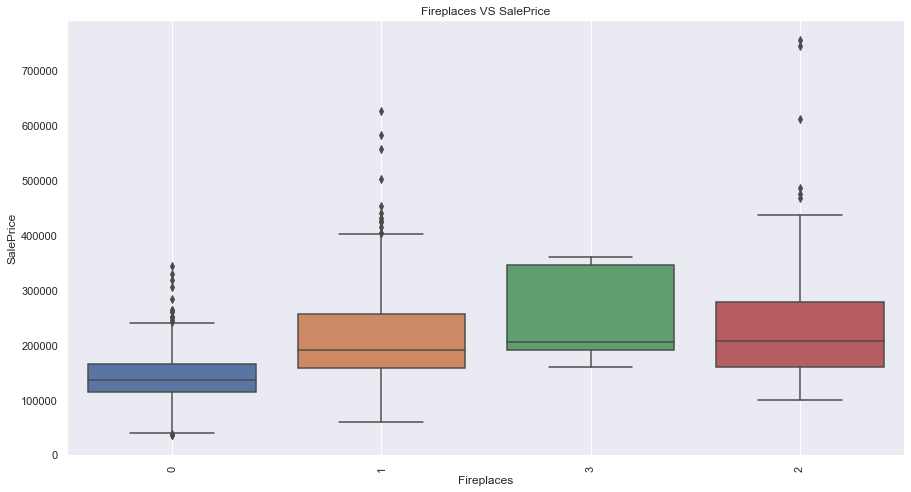

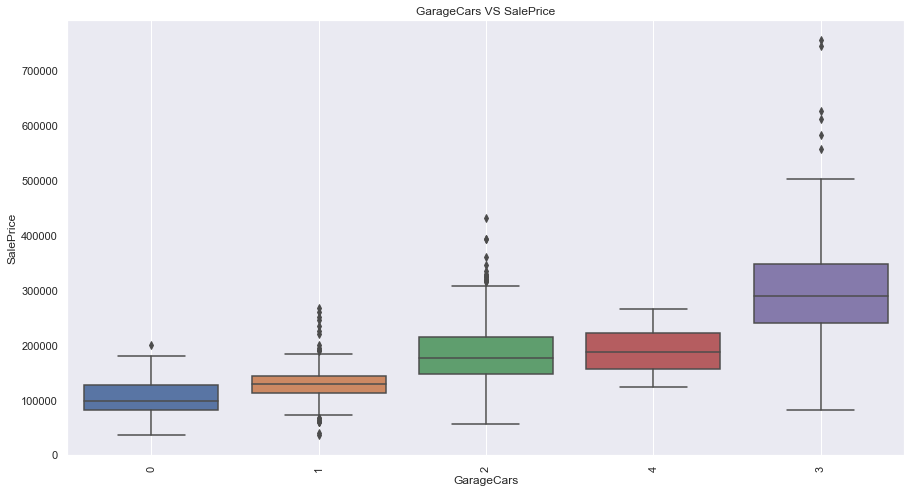

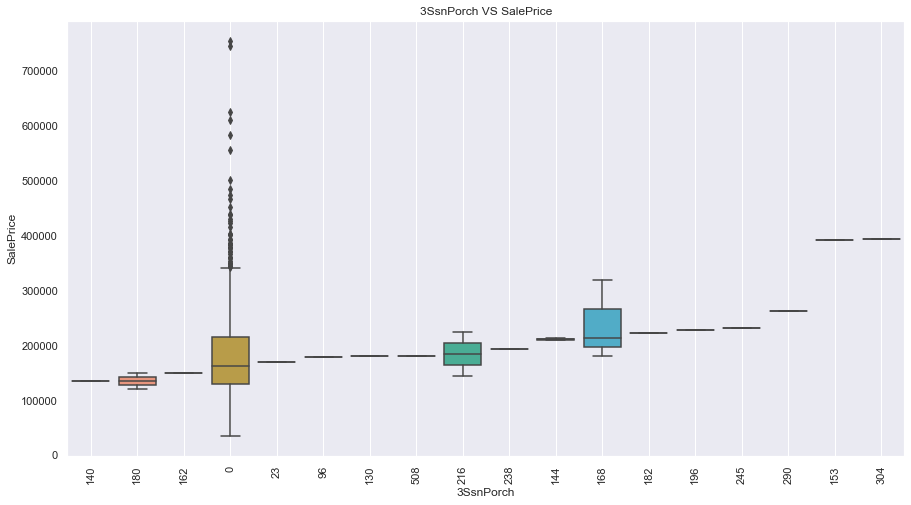

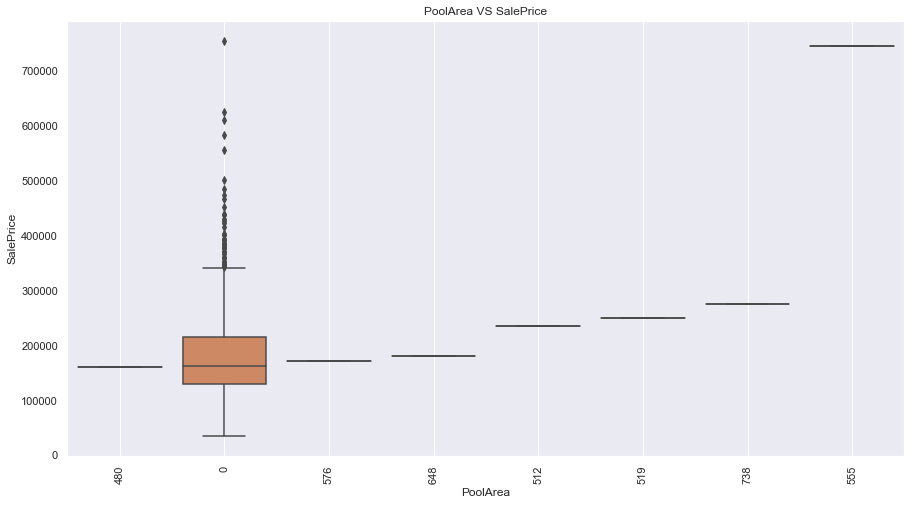

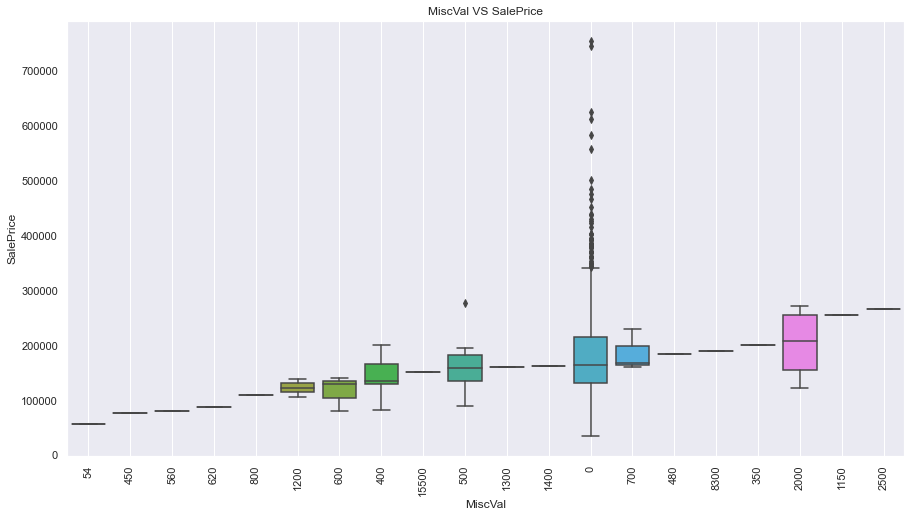

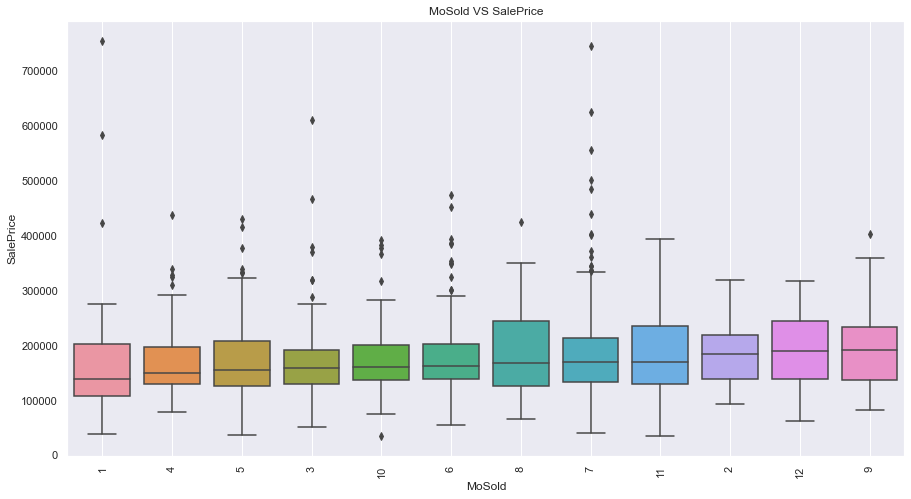

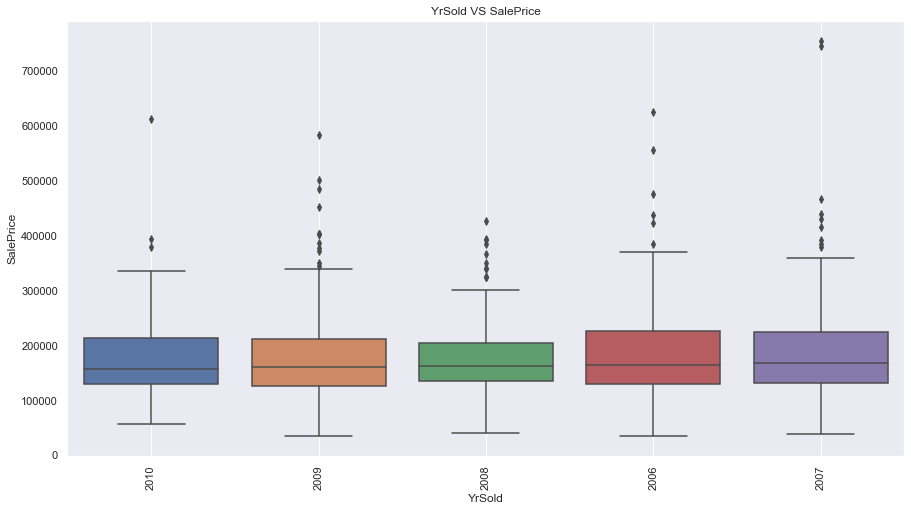

In [68]:
for i in desc_num_variables:
    box_plot(i,'SalePrice')

# CONTINOUS NUMERICAL VARIABLE  (Except variables having 0 value in data points)

In [69]:
#analyzing continous variables from numerical variables
cont_num_variables = []

for i in numerical_variables:
    if i not in desc_num_variables and i not in year_features:
        cont_num_variables.append(i)

In [70]:
#creating a function to create joint plots for continous numerical variables 
def joint_plot(x,y):
    plt.figure(figsize=(12,8))
    sns.jointplot(x=x,y=y,data=train,kind='scatter')
    plt.title("{} vs {}".format(x,y))
    plt.show()
    print('='*120)

<Figure size 864x576 with 0 Axes>

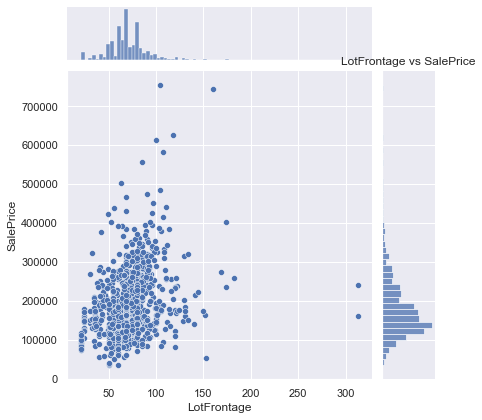

<Figure size 864x576 with 0 Axes>

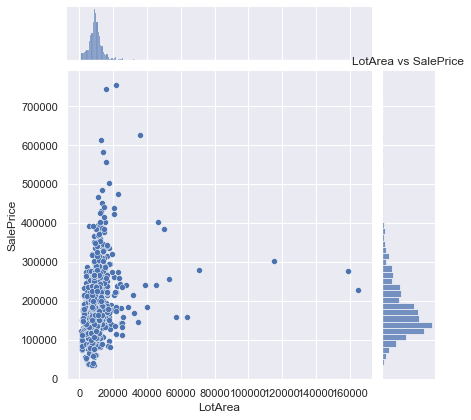

<Figure size 864x576 with 0 Axes>

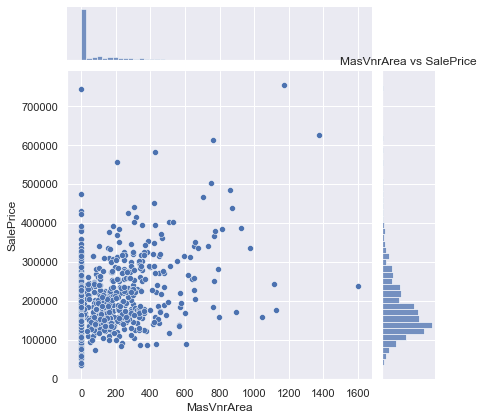

<Figure size 864x576 with 0 Axes>

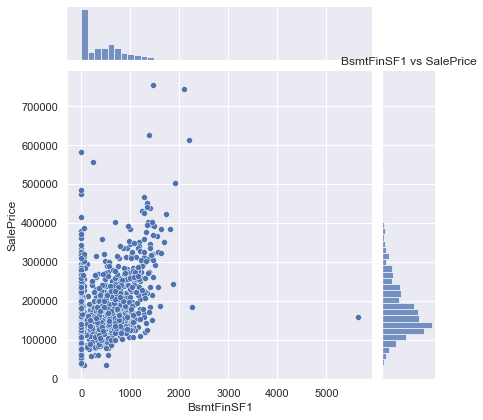

<Figure size 864x576 with 0 Axes>

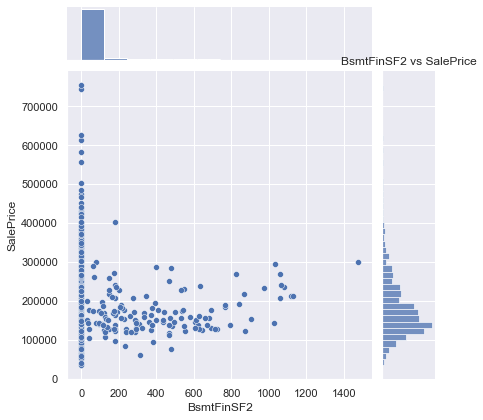

<Figure size 864x576 with 0 Axes>

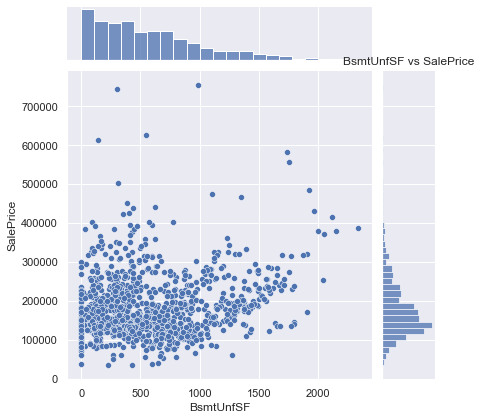

<Figure size 864x576 with 0 Axes>

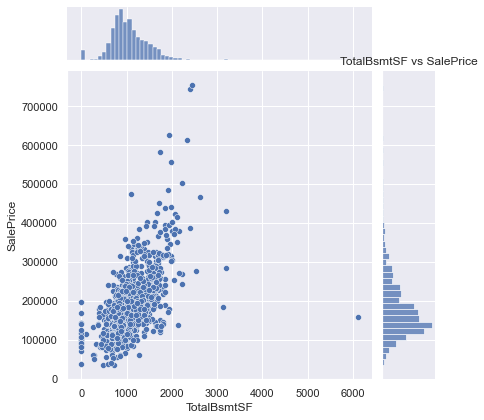

<Figure size 864x576 with 0 Axes>

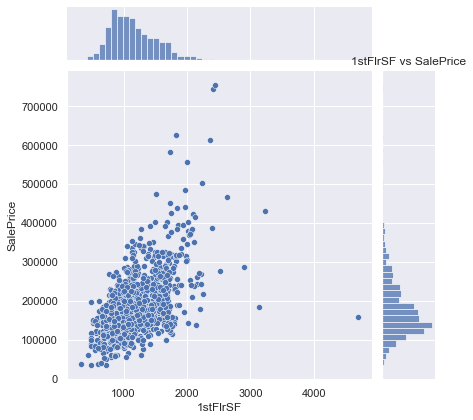

<Figure size 864x576 with 0 Axes>

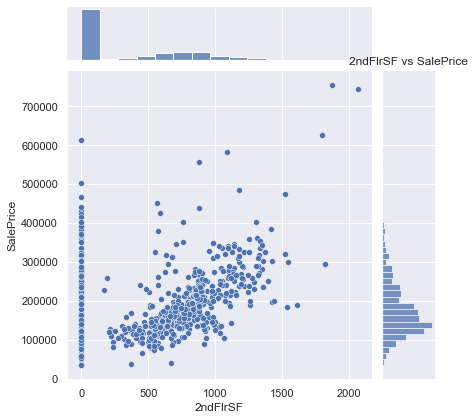

<Figure size 864x576 with 0 Axes>

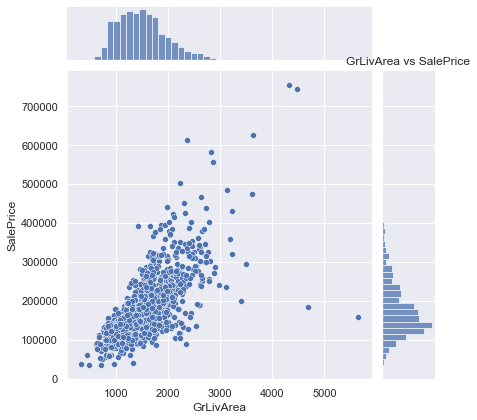

<Figure size 864x576 with 0 Axes>

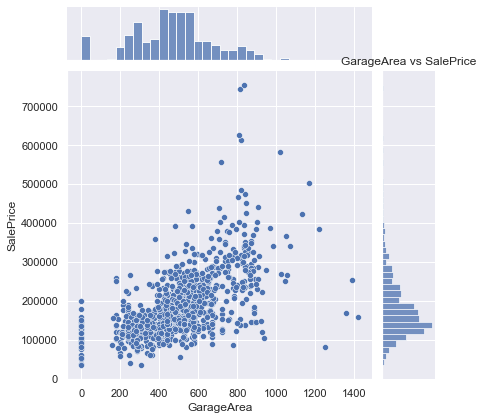

<Figure size 864x576 with 0 Axes>

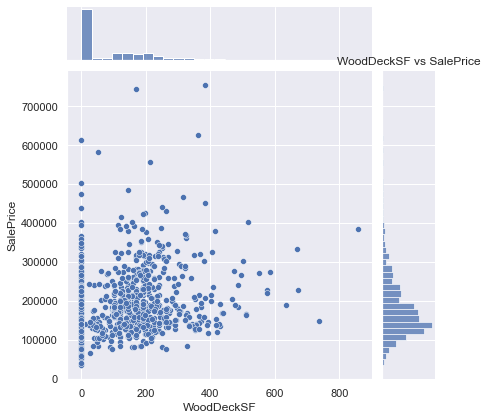

<Figure size 864x576 with 0 Axes>

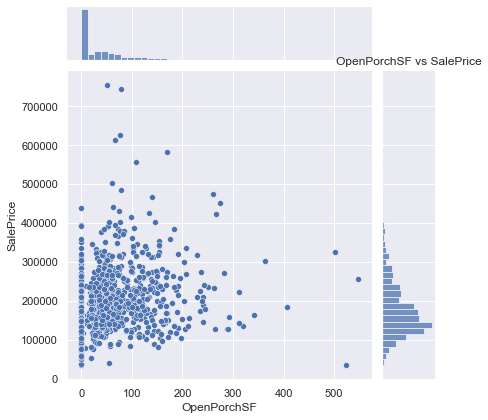

<Figure size 864x576 with 0 Axes>

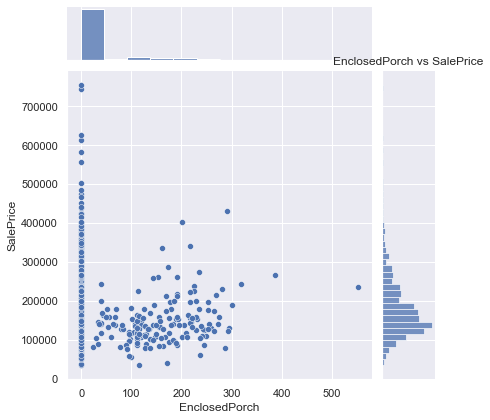

<Figure size 864x576 with 0 Axes>

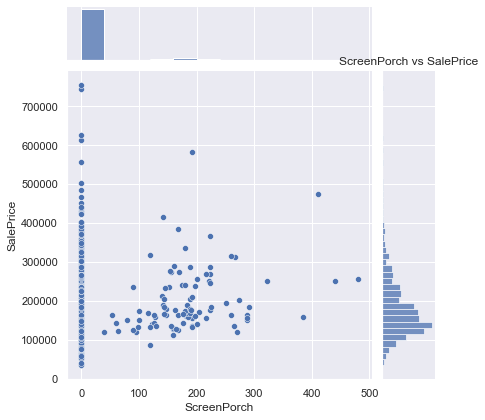

<Figure size 864x576 with 0 Axes>

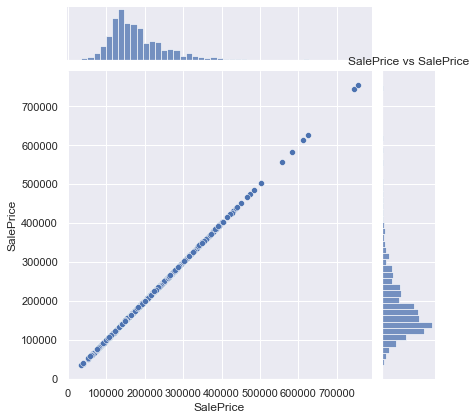

In [71]:
for i in cont_num_variables:
    joint_plot(i,'SalePrice')

***Most of the continous variables are right skewed, we will try log transformation technique to make distribution of continous variable close to normal. For proper visualization of distribution I will be plotting distplot below***

In [72]:
def distplot(x):
    plt.figure(figsize=(6,4))
    sns.distplot(train[x])
    plt.title("distribuition of {}".format(x))
    plt.show()
    print('='*120)

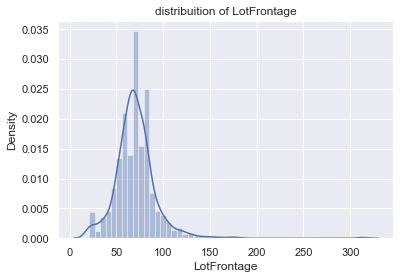

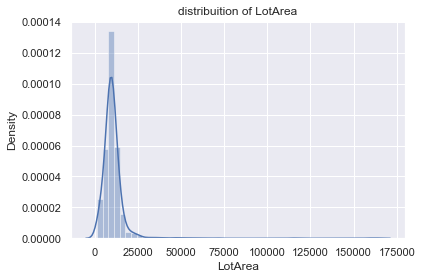

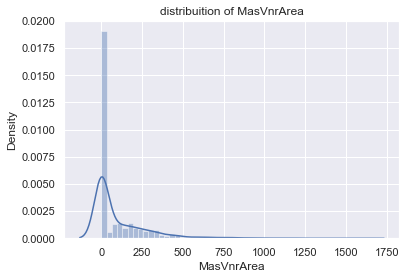

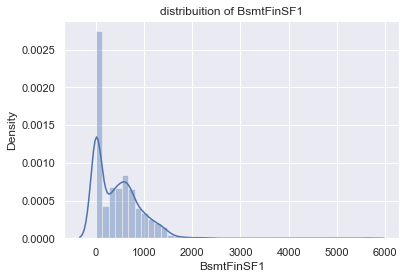

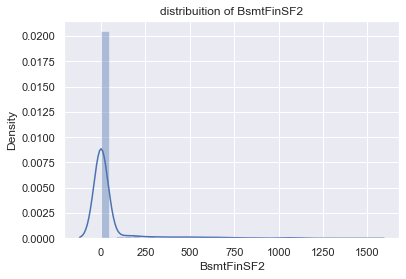

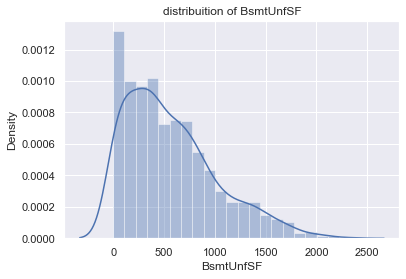

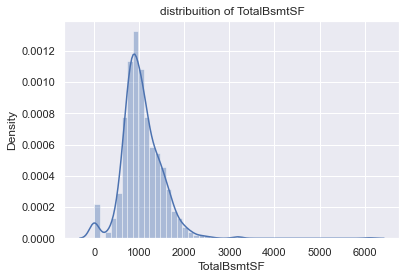

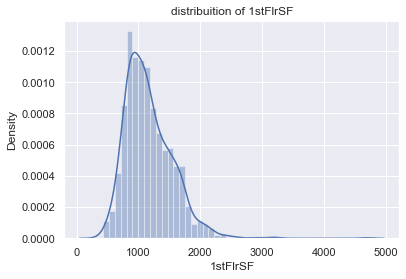

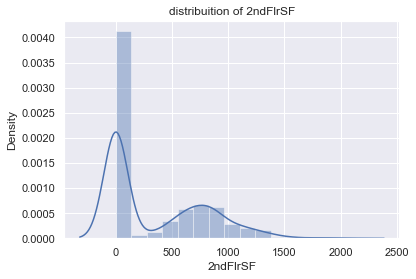

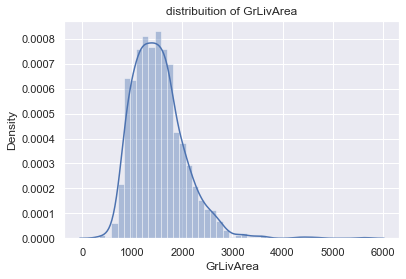

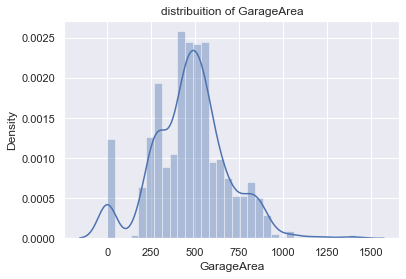

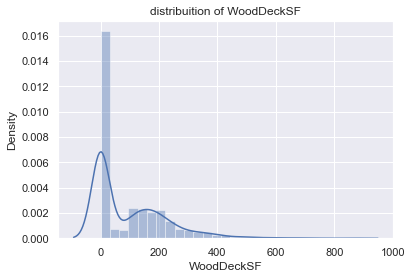

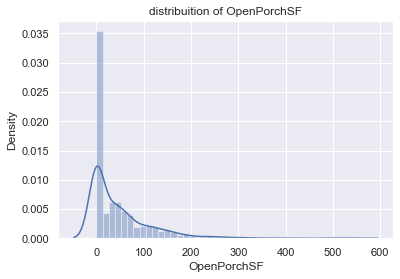

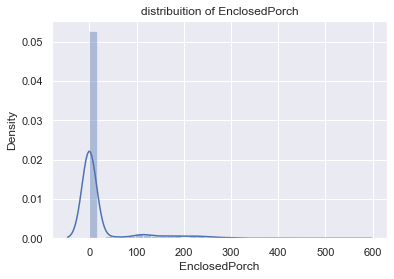

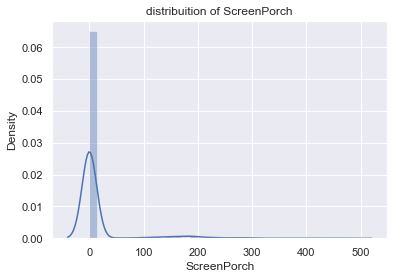

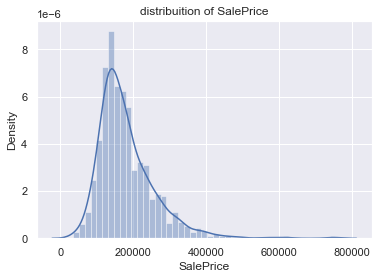

In [73]:
for i in cont_num_variables:
    distplot(i)

as we can see that the cont numerical variables are not normally ditributed, I will try to transform using log normal transformation

In [74]:
train_new = train.copy()

In [75]:
train_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL         68.0     4928   Pave  none      IR1   
1          20       RL         95.0    15865   Pave  none      IR1   
2          60       RL         92.0     9920   Pave  none      IR1   
3          20       RL        105.0    11751   Pave  none      IR1   
4          20       RL         65.0    16635   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1 

In [76]:
for i in cont_num_variables:
    if 0 not in train_new[i].unique():  #not taking variables which has 0 at any data point as log of 0 is not defined
        train_new[i] = np.log(train_new[i])
        

In [77]:
train_new.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0         120       RL     4.219508  8.502689   Pave  none      IR1   
1          20       RL     4.553877  9.671871   Pave  none      IR1   
2          60       RL     4.521789  9.202308   Pave  none      IR1   
3          20       RL     4.653960  9.371694   Pave  none      IR1   
4          20       RL     4.174387  9.719264   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  6.864848         0             0   6.864848   
1          Y      SBrkr  7.703910         0             0   7.703910   
2          Y      SBrkr  7.027315       886             0   7.607381   
3          Y      SBrkr  7.519692         0             0   7.519692   
4          Y      SBrkr  7.379008         0             0   7.379008   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ       

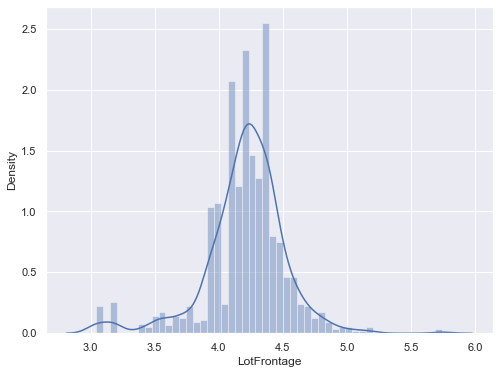

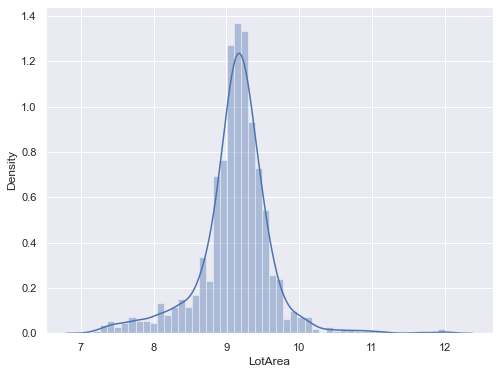

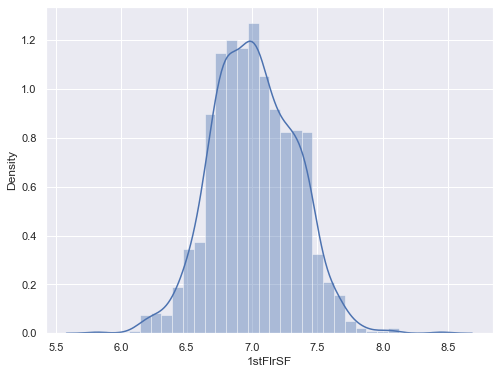

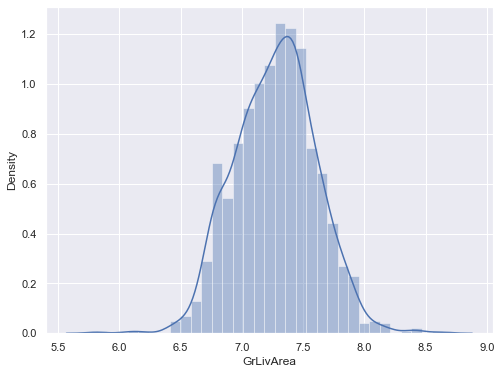

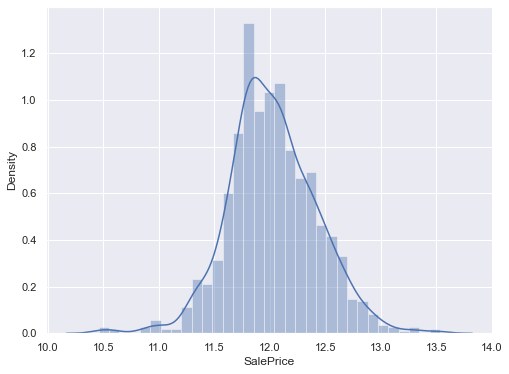

In [78]:
#checking the distribution of continous numerical variables
for i in cont_num_variables:
    if 0 not in train_new[i].unique():
        plt.figure(figsize=(8,6))
        sns.distplot(train_new[i])
        plt.show()
        print('='*120)

Using log transformation we have almost normal distrubuted continous variables ( continous variables which doesn't have 0 at any data point)

***Using boxplot for outliers in continous numeric variables***

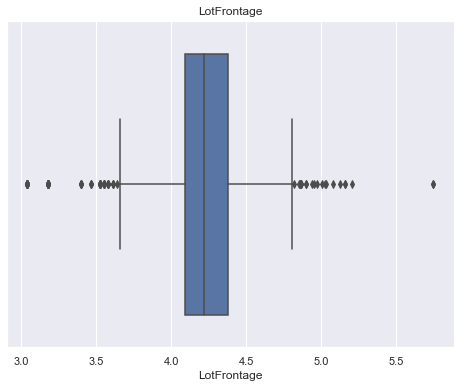

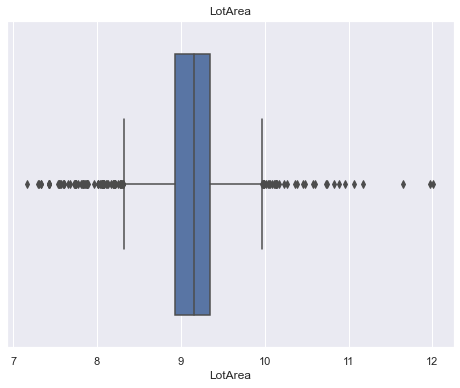

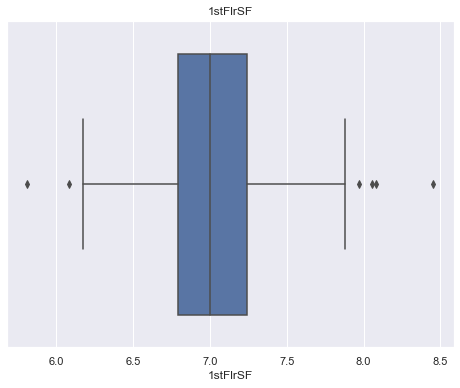

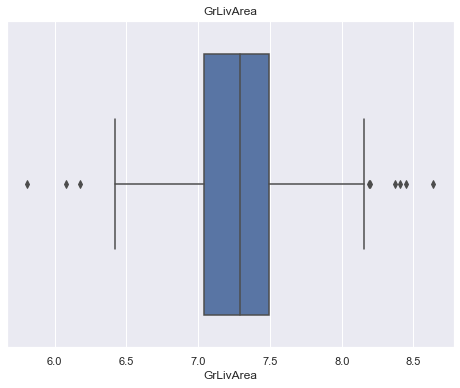

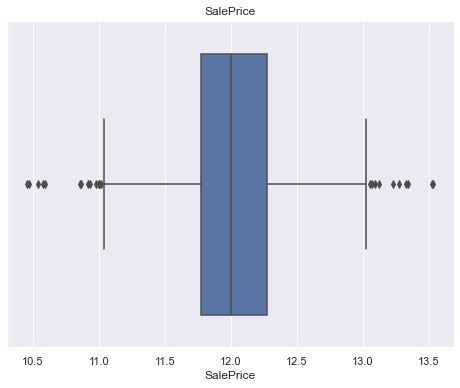

In [79]:
#Outliers analysis
# I will use only continous variables for outlier detection and based on the index of continous variables having outliers 
# I will update my data set
for i in cont_num_variables:
    if 0 not in train_new[i].unique():
        plt.figure(figsize=(8,6))
        sns.boxplot(train_new[i])
        plt.xlabel(i)
        plt.title(i)
        plt.show()
        print('='*120)

# CATEGORICAL VARIABLES

In [80]:
cat_var = []

for i in train_new.columns:
    if i not in numerical_variables:
        cat_var.append(i)
        
print(cat_var)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [81]:
#creating a function to plot boxplot for all the categorical variables
def box_plot(x,y):
    sns.set(style="ticks")
    sns.set_style("darkgrid")
    plt.figure(figsize=(15,8))
    sns.boxplot(x=x,y=y,data=train_new,order=train_new.groupby(i)['SalePrice'].median().sort_values(ascending=True).index)
    plt.title("{} VS {}".format(x,y))
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()
    print('='*120)

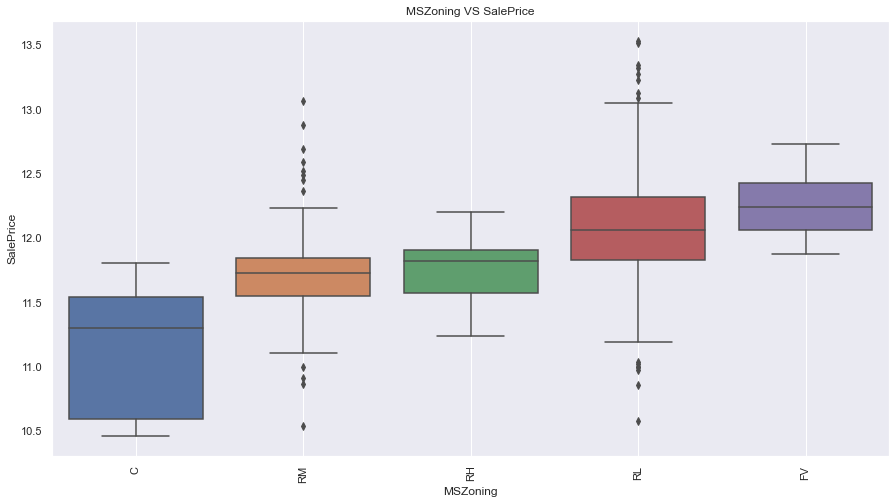

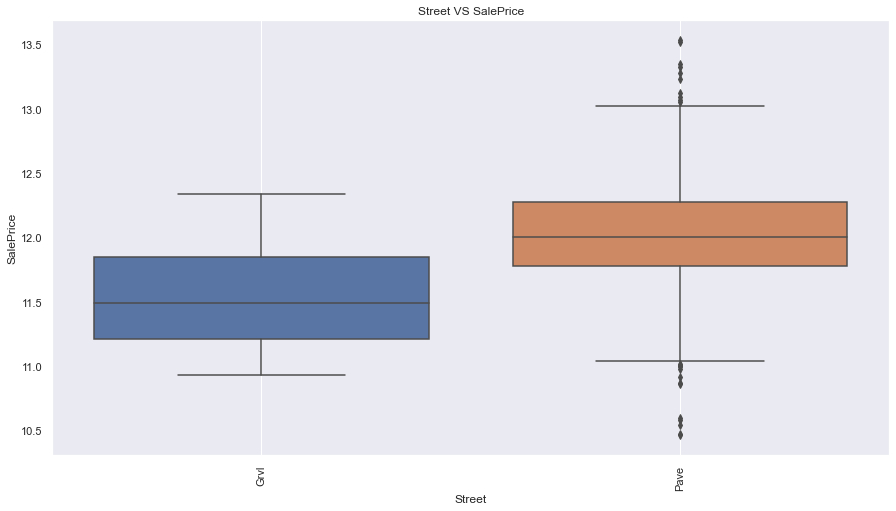

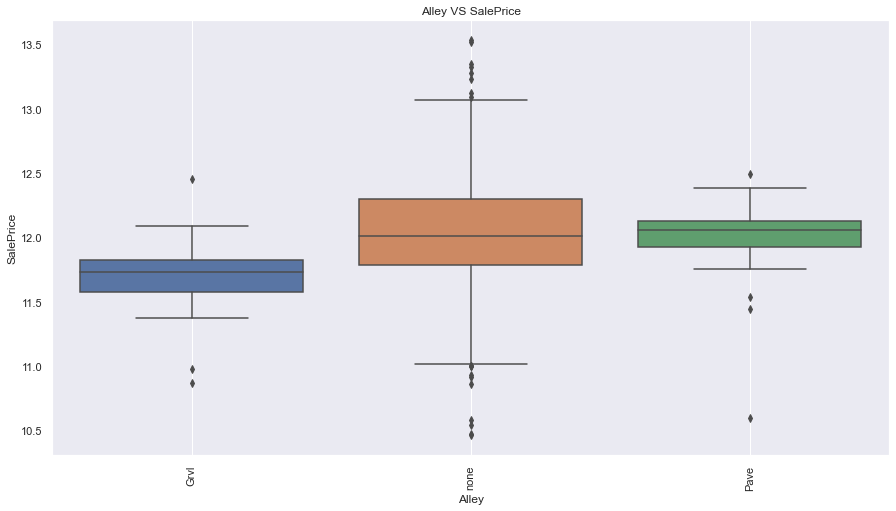

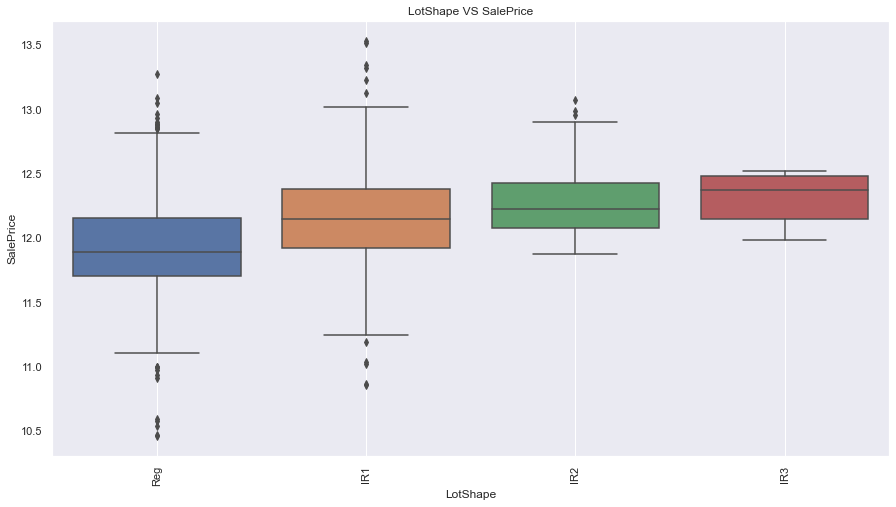

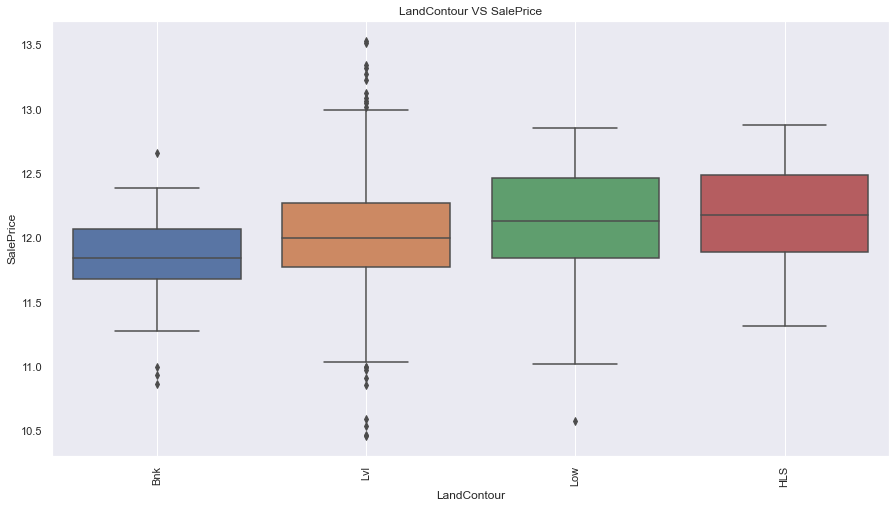

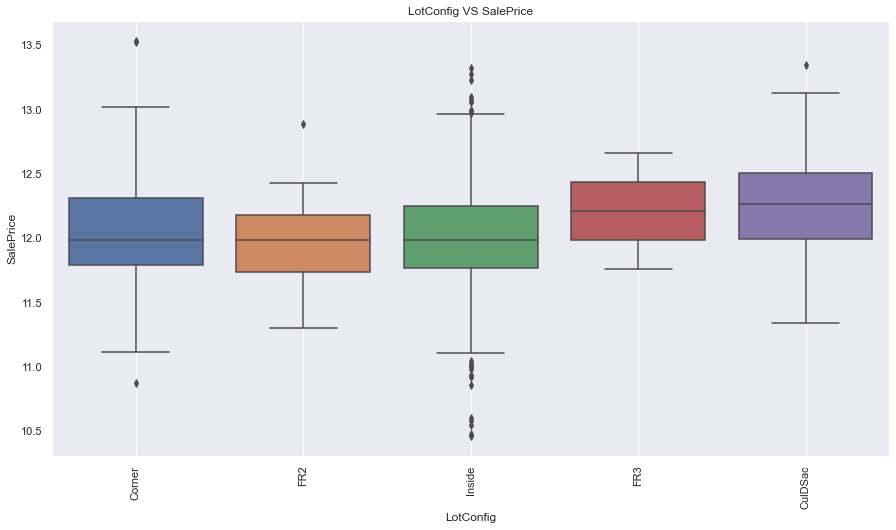

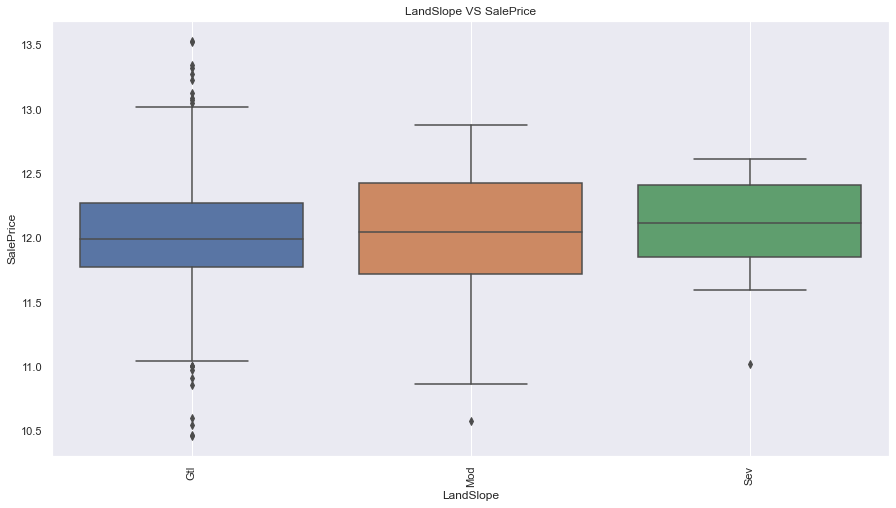

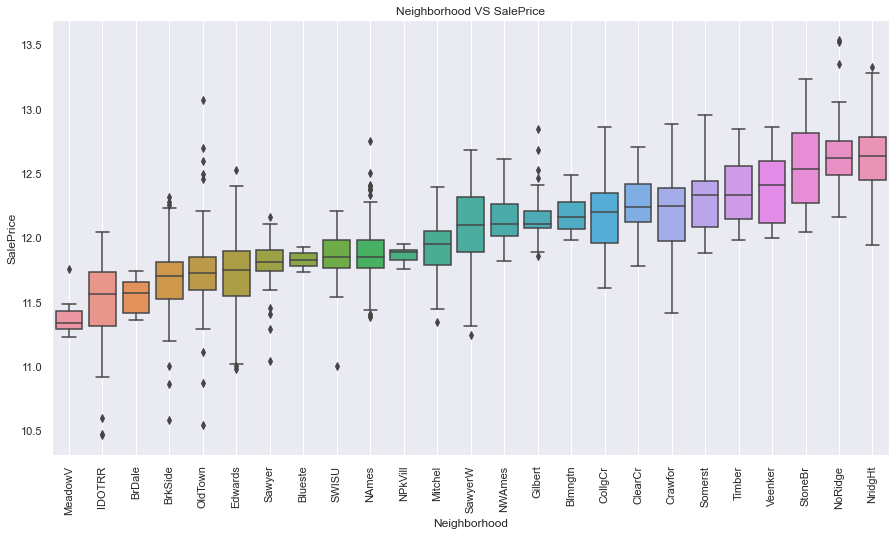

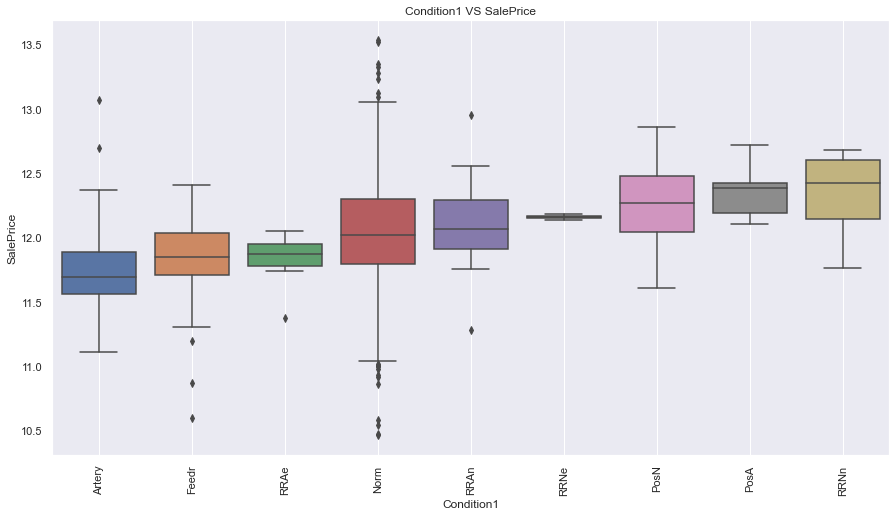

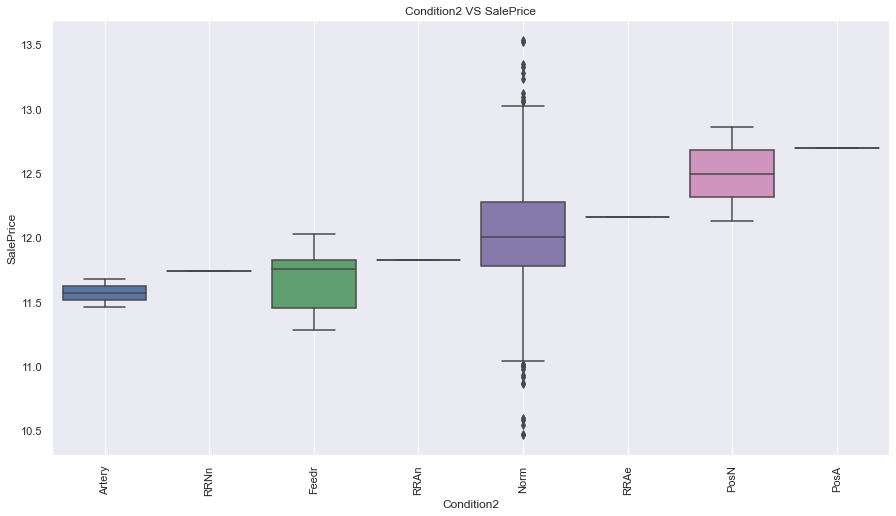

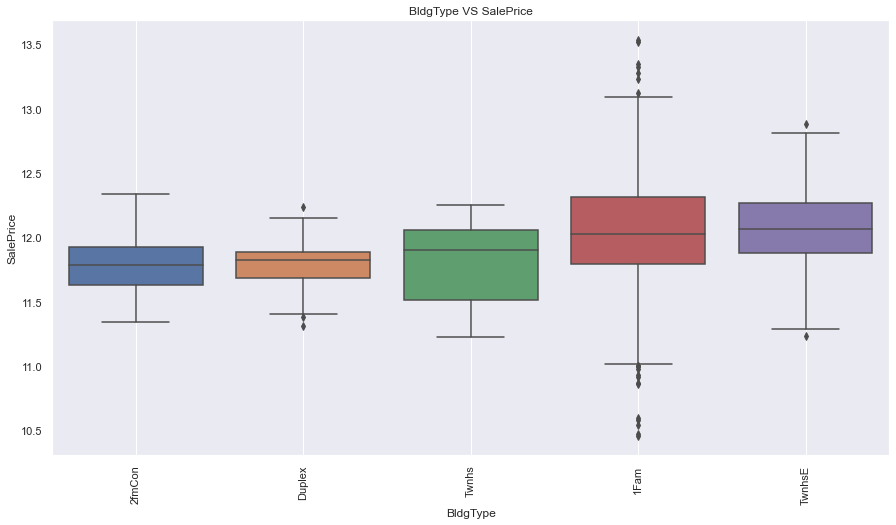

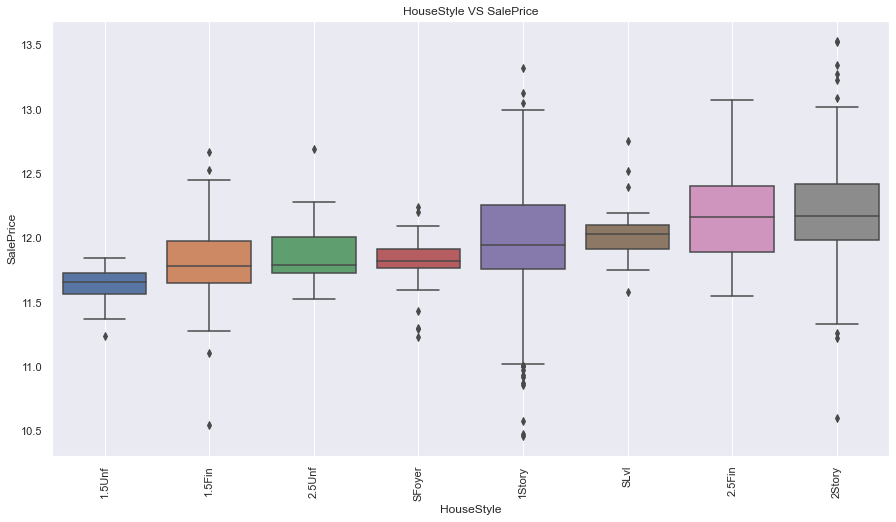

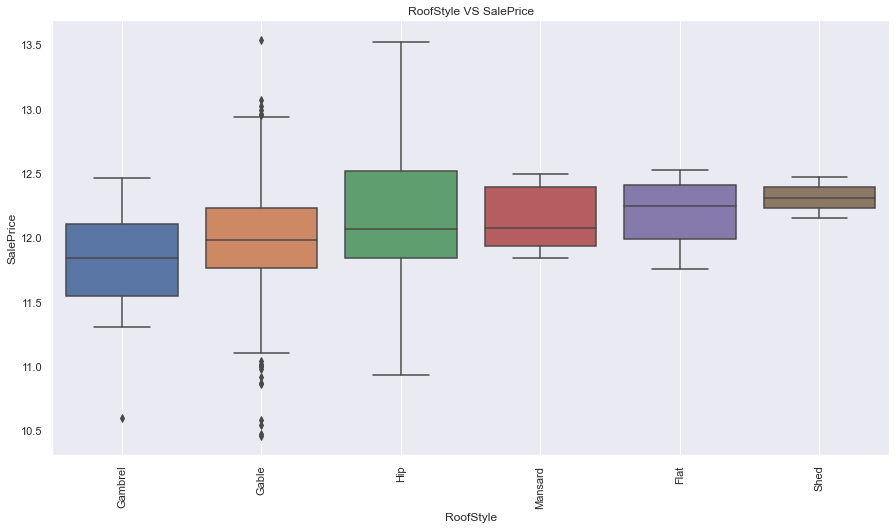

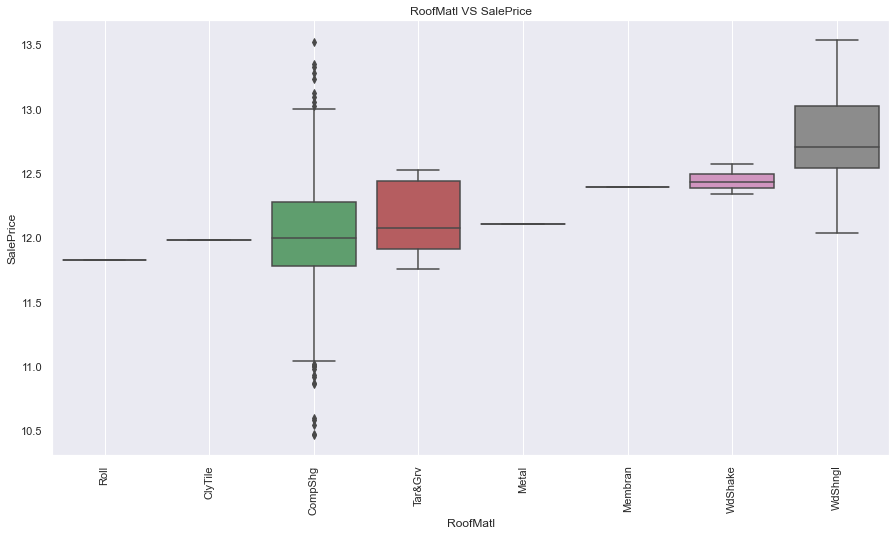

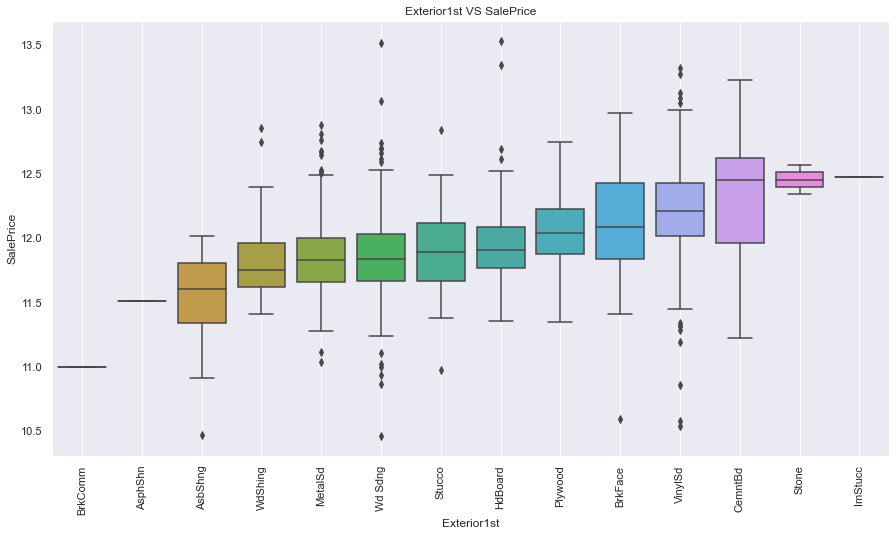

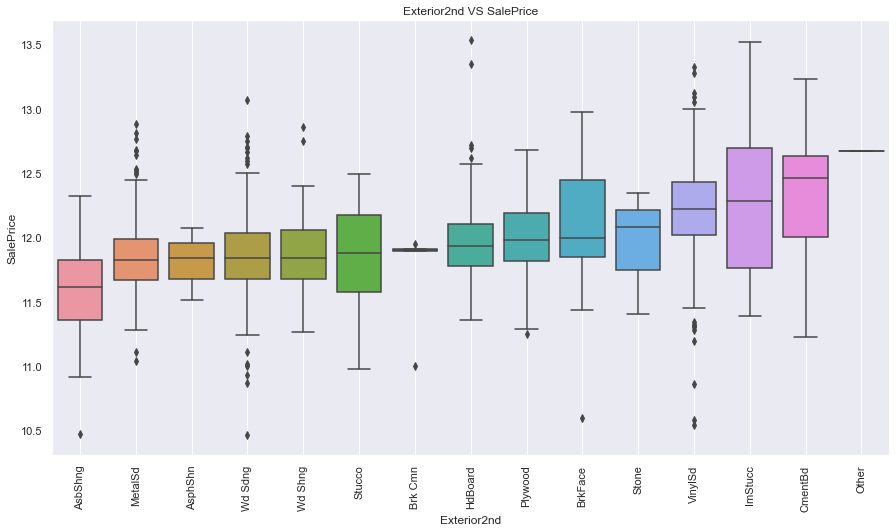

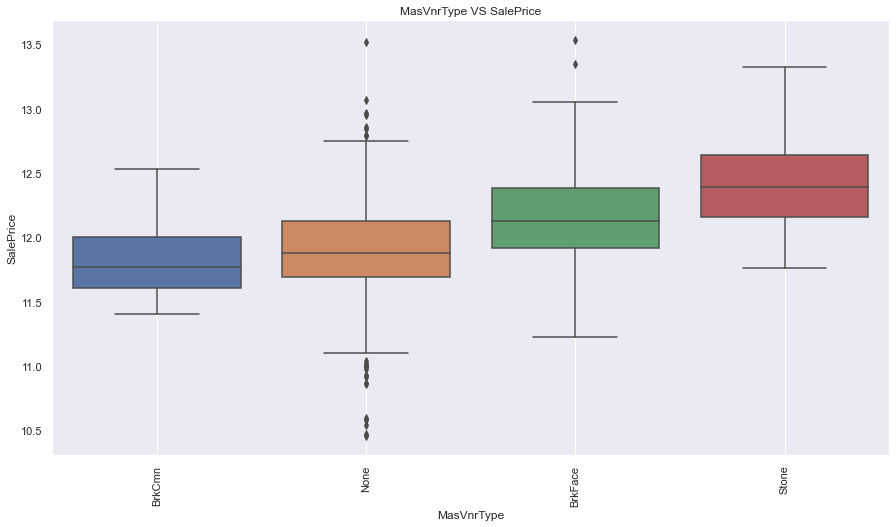

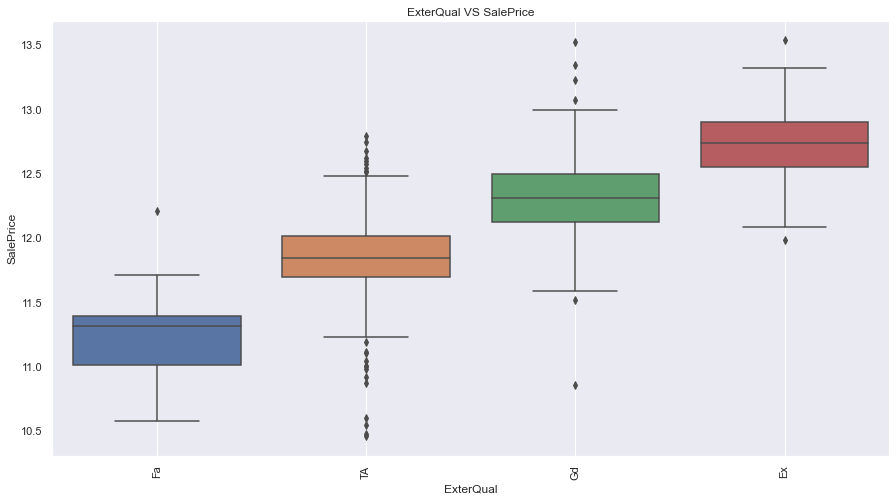

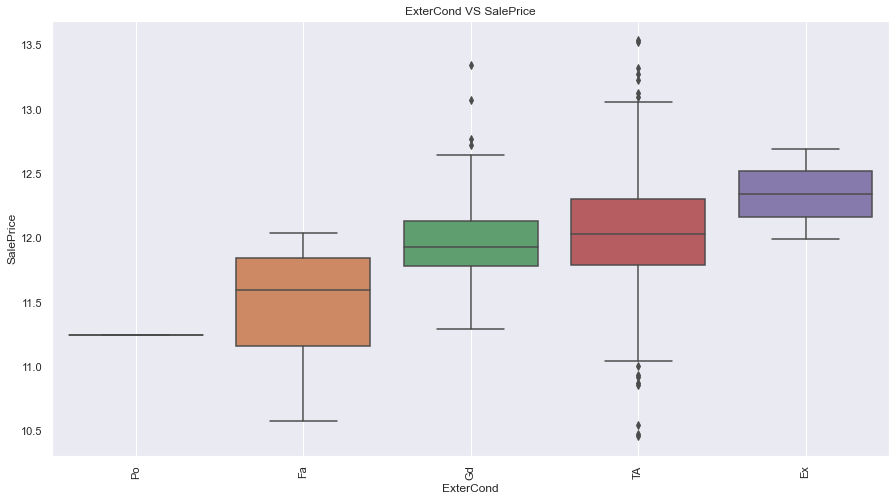

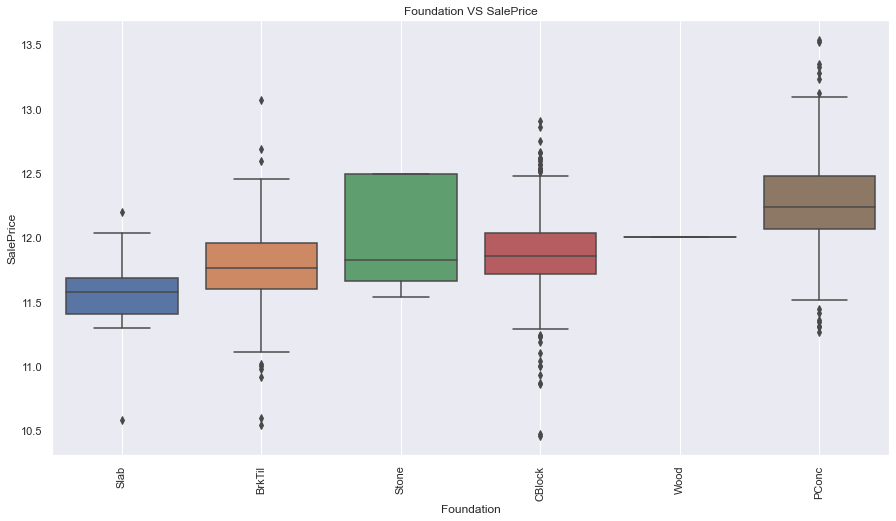

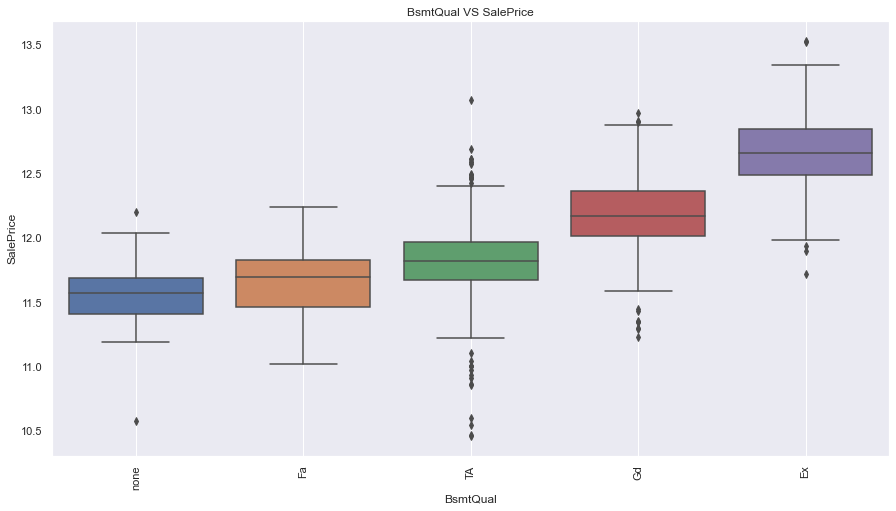

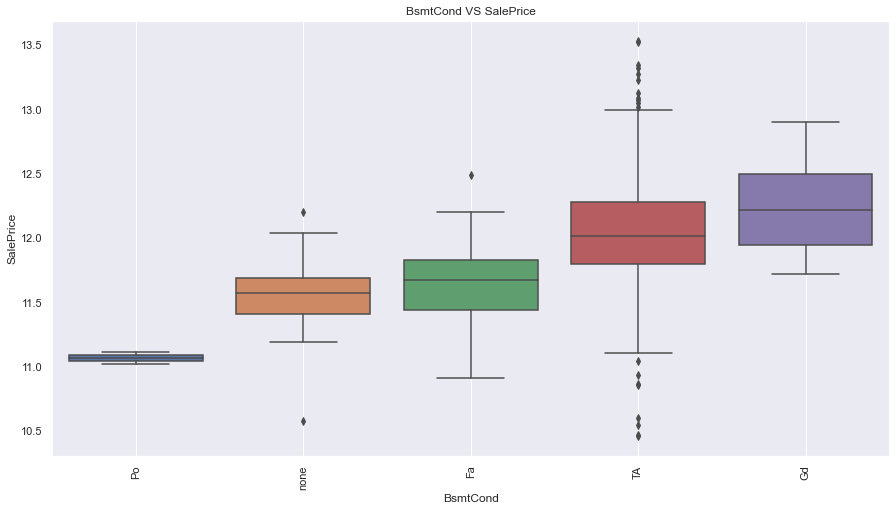

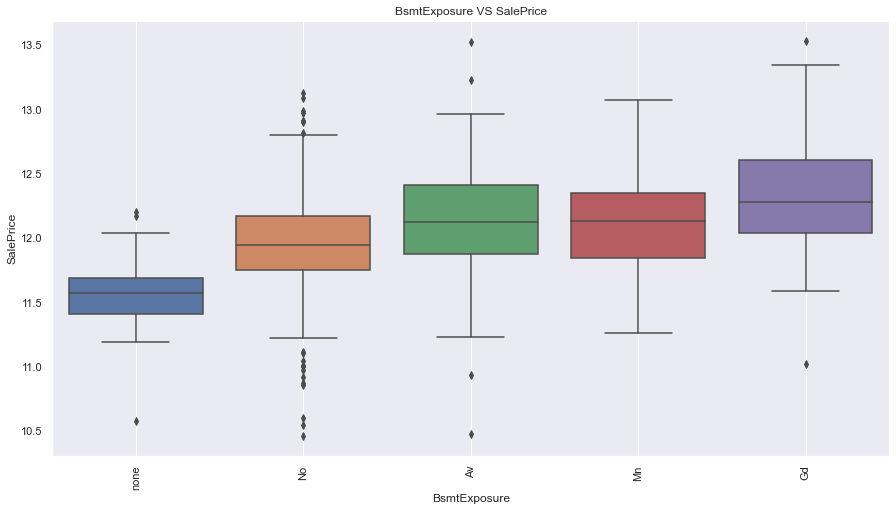

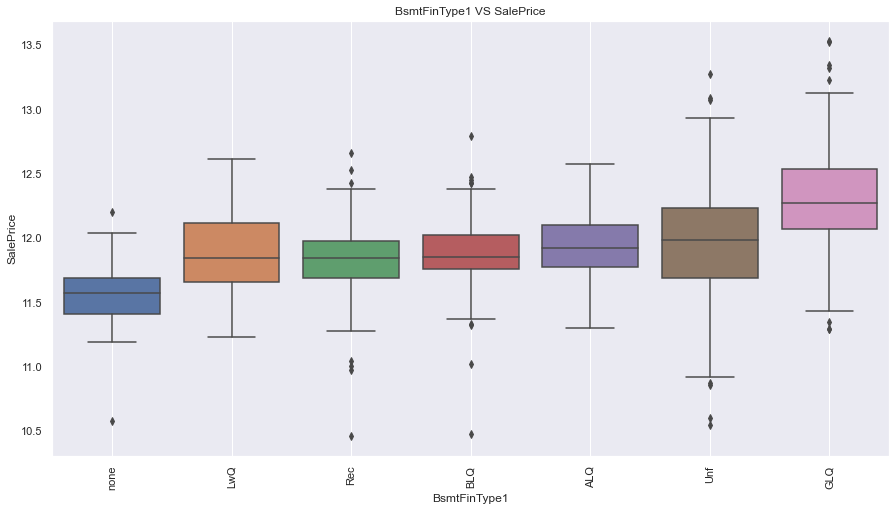

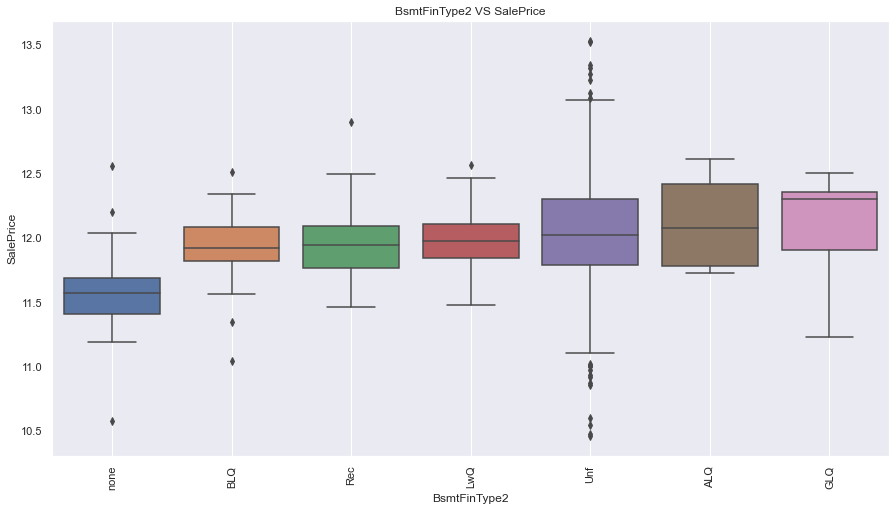

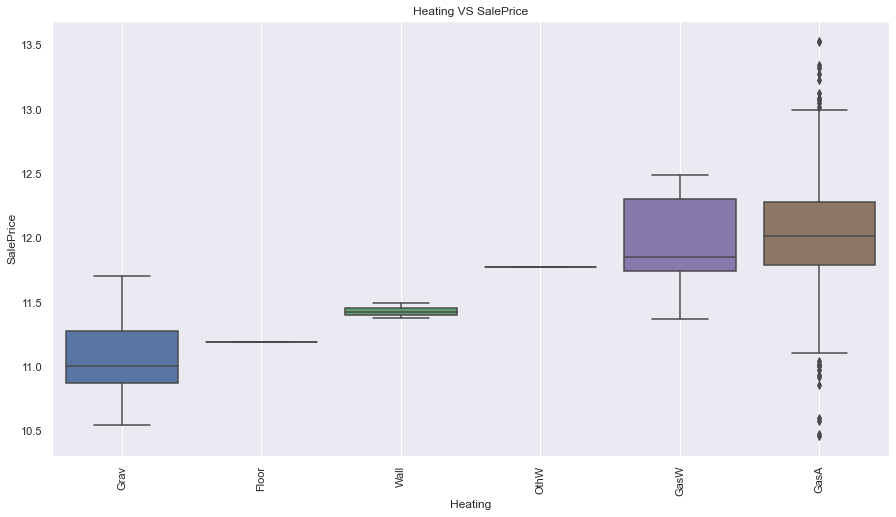

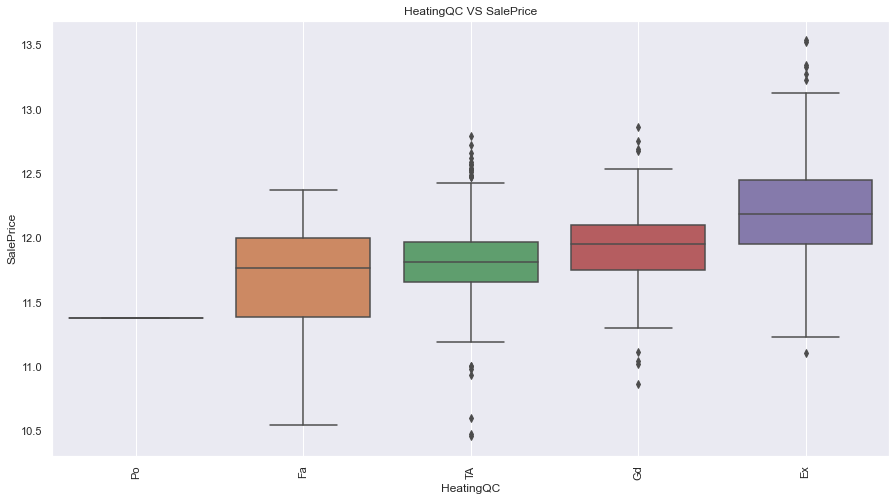

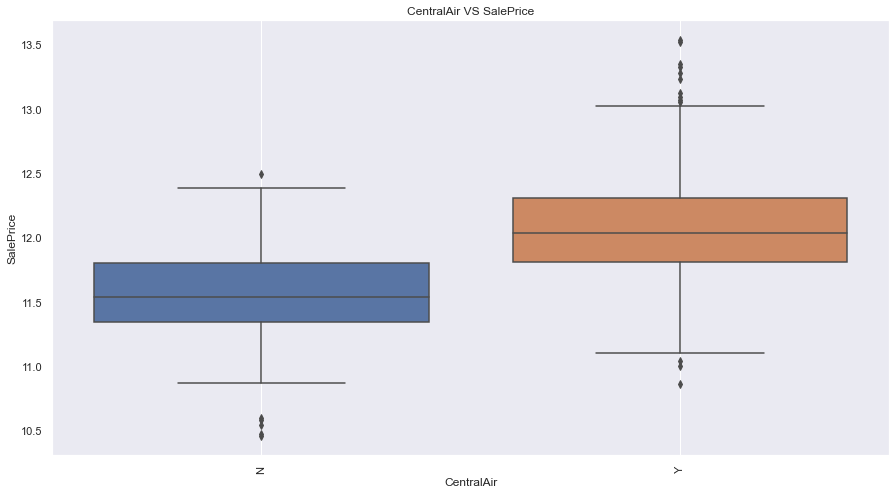

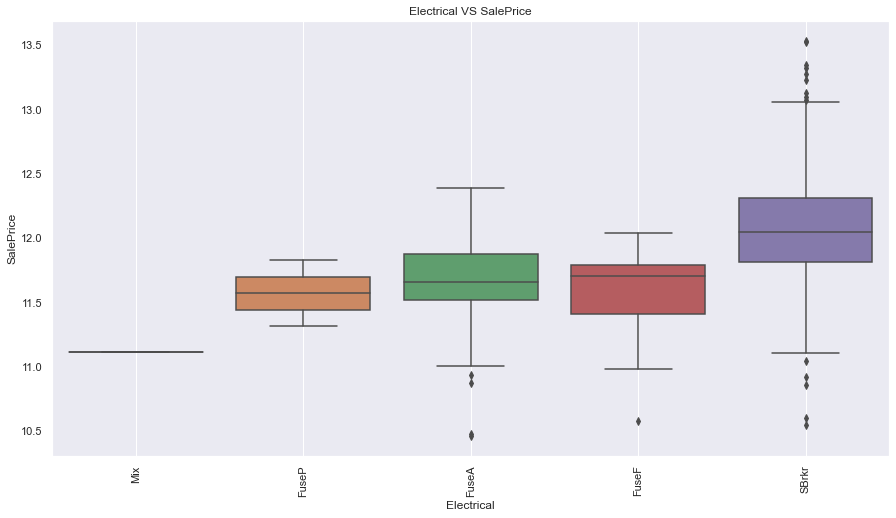

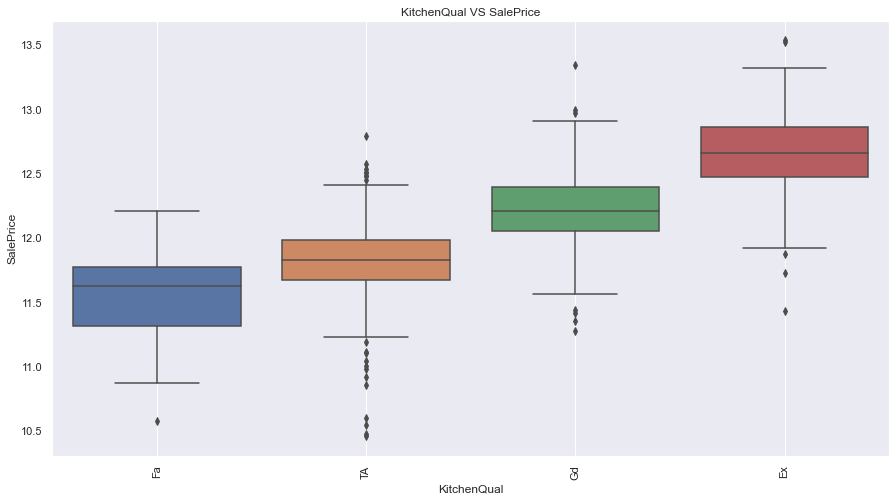

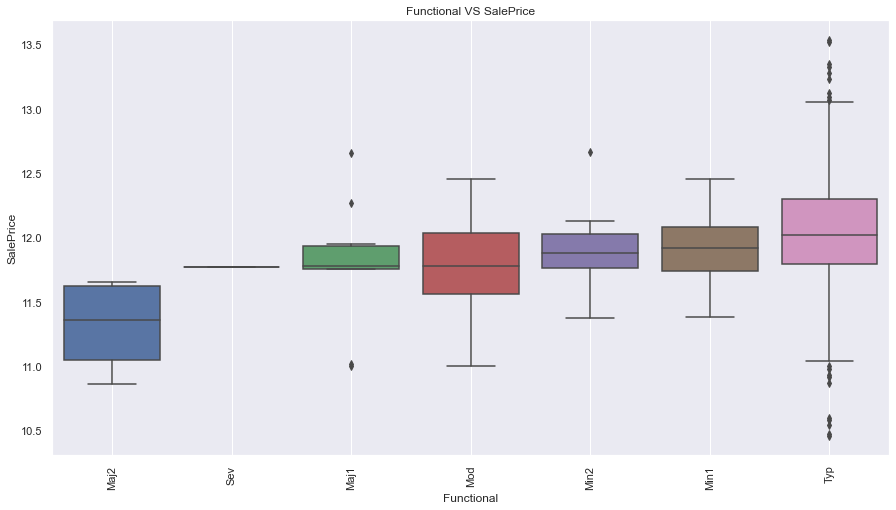

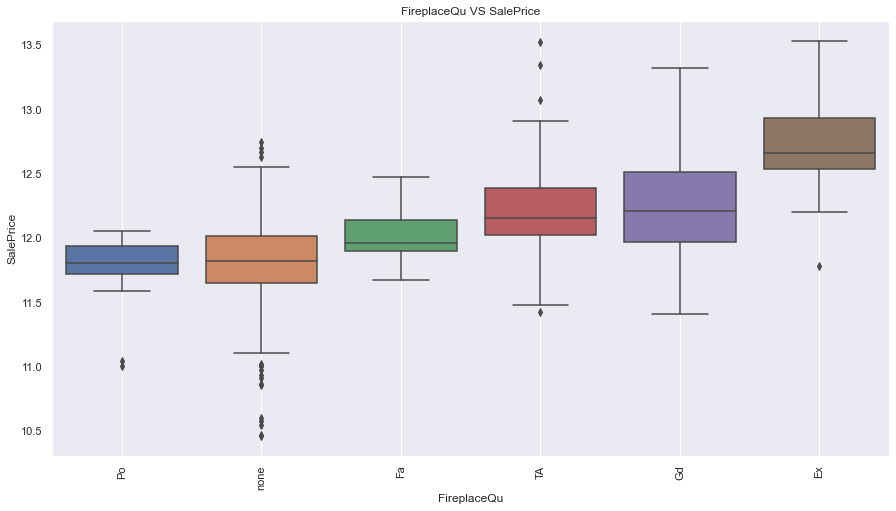

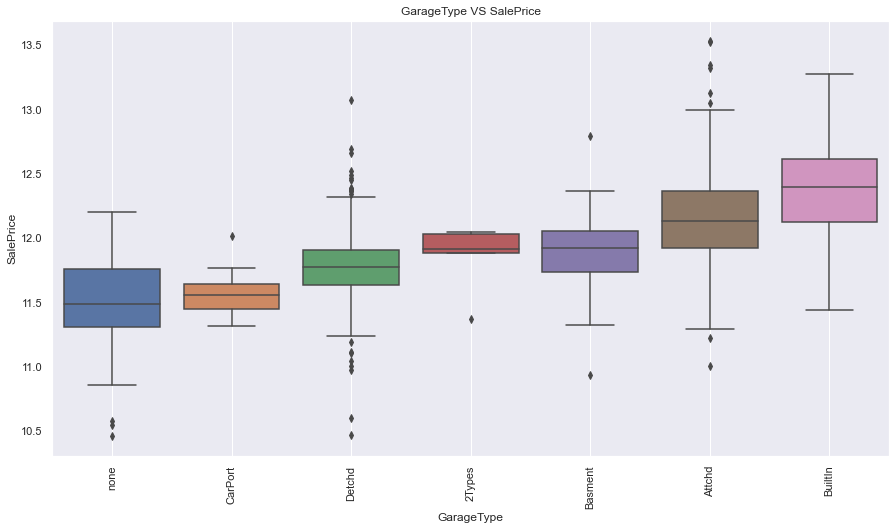

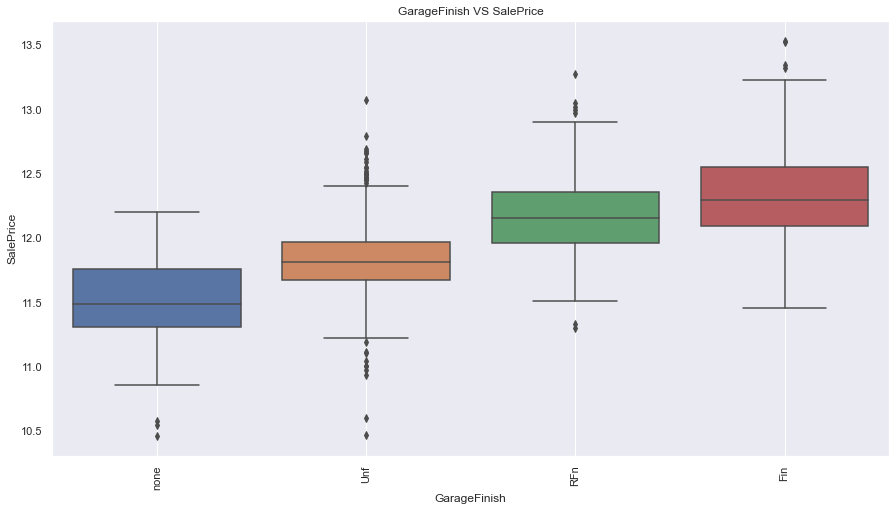

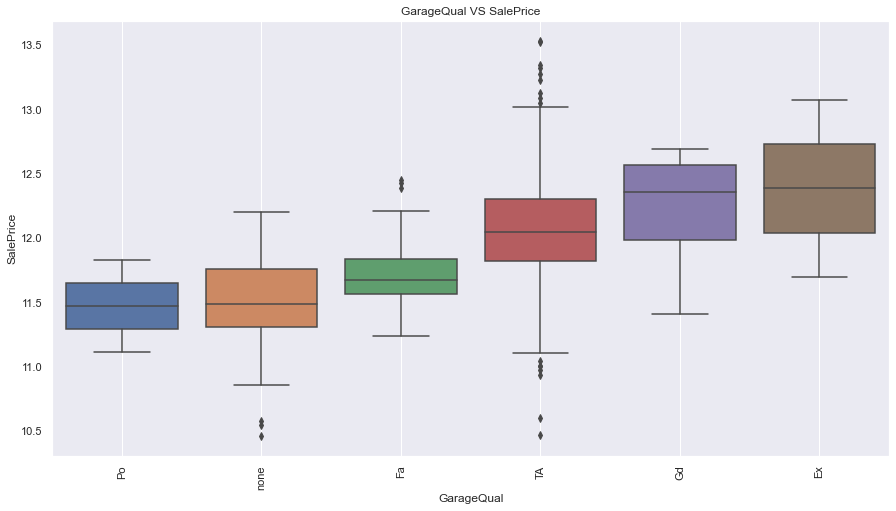

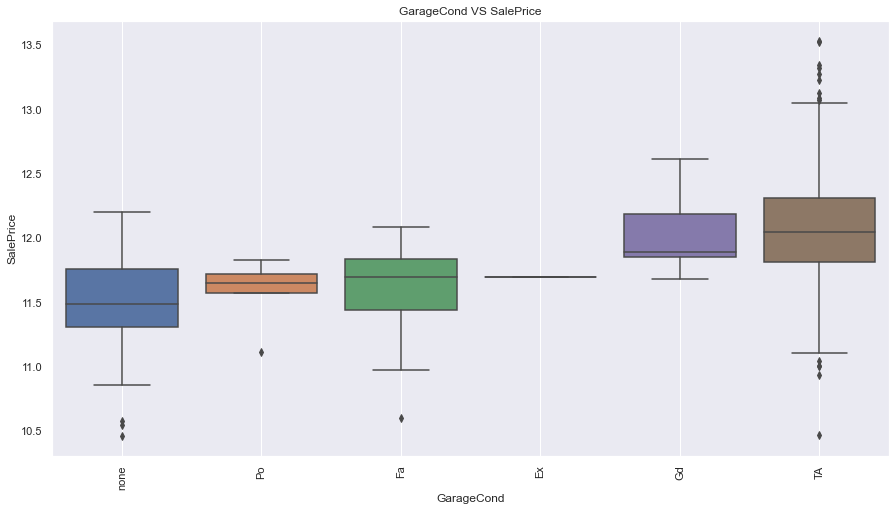

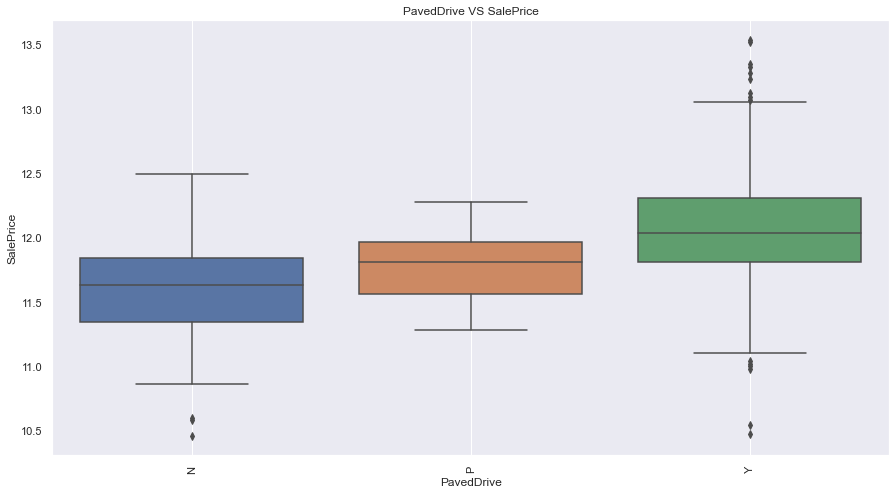

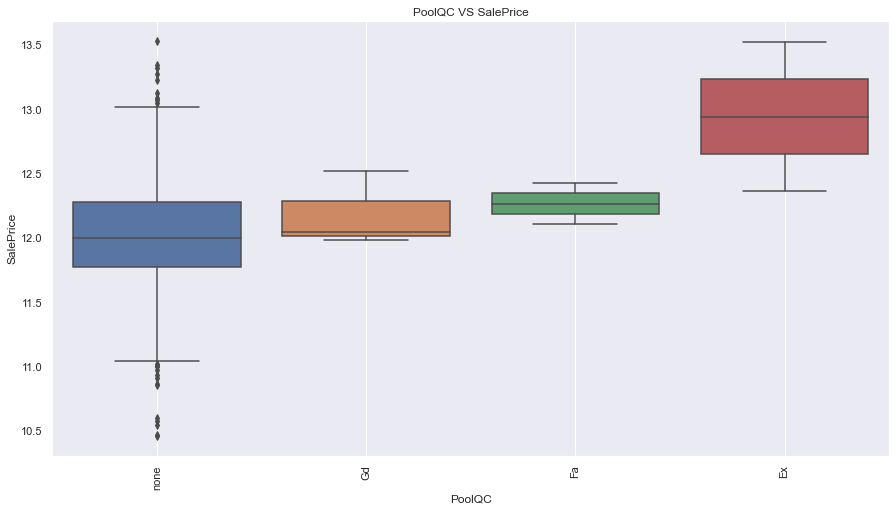

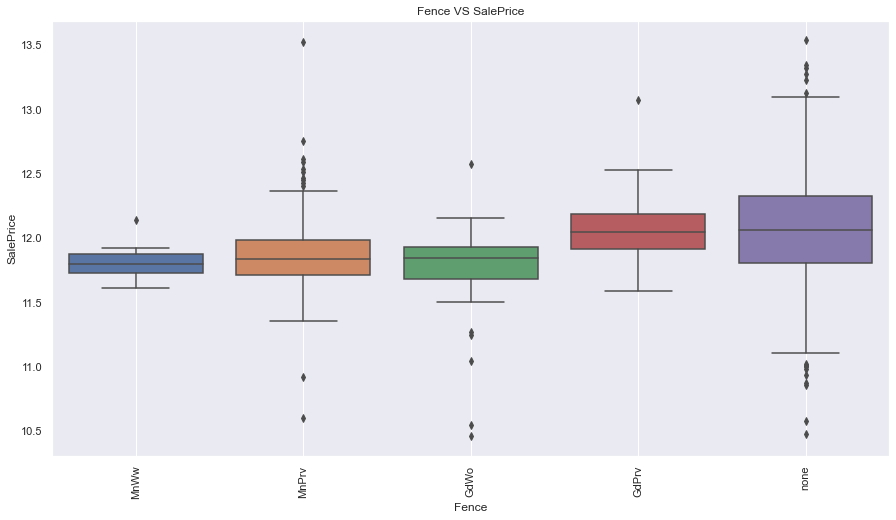

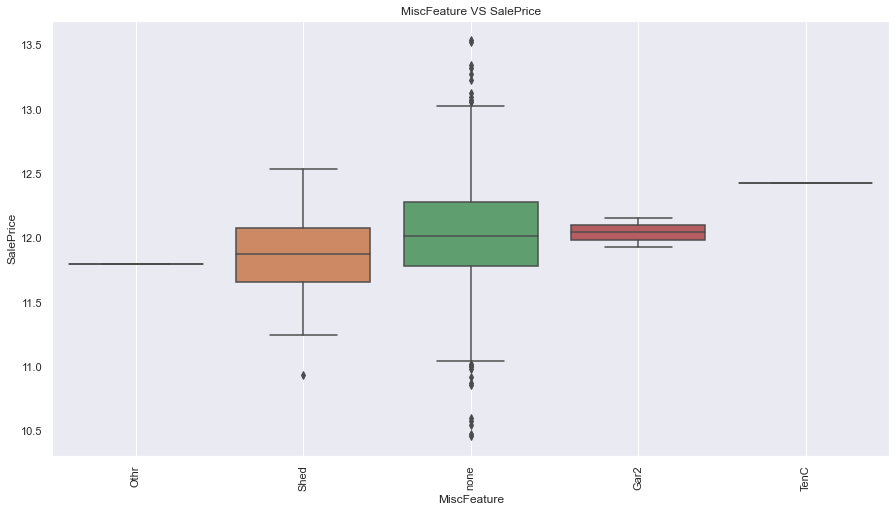

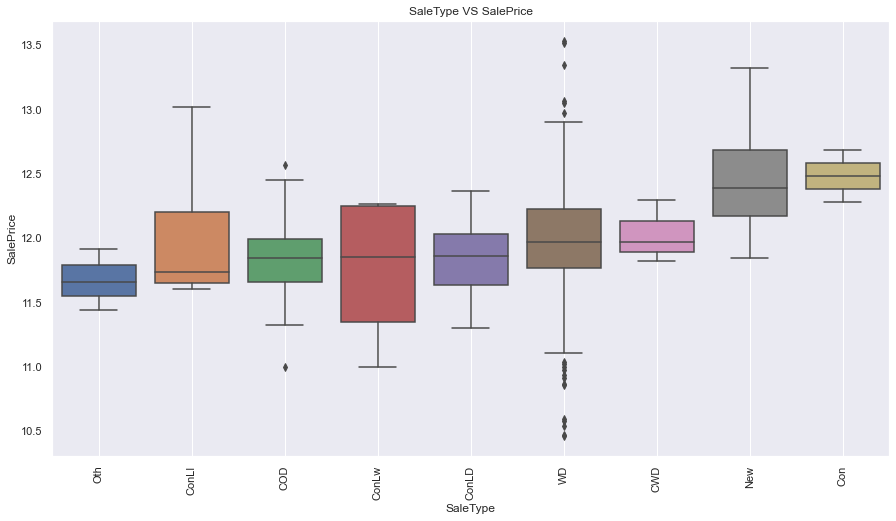

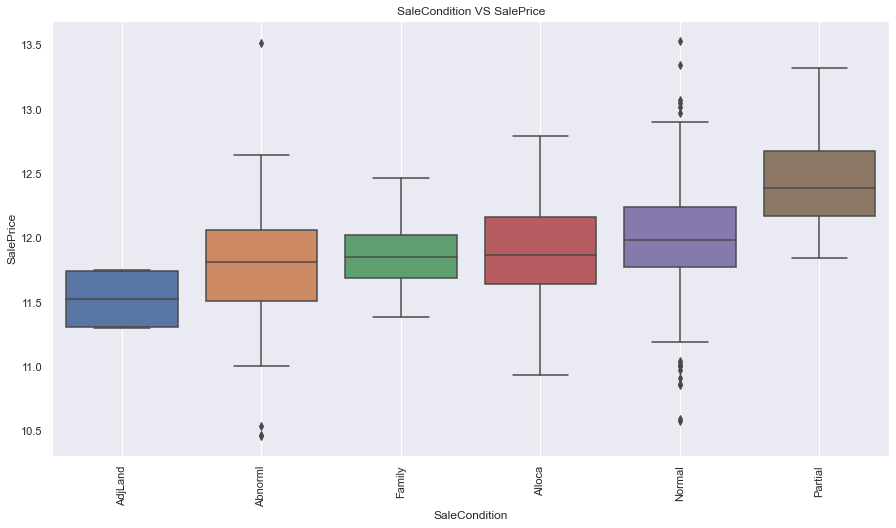

In [82]:
for i in cat_var:
    box_plot(i,'SalePrice')

In [83]:
#I need to transform my test data as well same as I did for train data
test = pd.read_csv('cleaned_test.csv')
test.head()

Unnamed: 0  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0          20       RL         86.0    14157   Pave  none   
1           1         120       RL         48.0     5814   Pave  none   
2           2          20       RL         65.0    11838   Pave  none   
3           3          70       RL         75.0    12000   Pave  none   
4           4          60       RL         86.0    14598   Pave  none   

  LotShape LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
0      IR1         HLS    Corner       Gtl      StoneBr       Norm       Norm   
1      IR1         Lvl   CulDSac       Gtl      StoneBr       Norm       Norm   
2      Reg         Lvl    Inside       Gtl      CollgCr       Norm       Norm   
3      Reg         Bnk    Inside       Gtl      Crawfor       Norm       Norm   
4      IR1         Lvl   CulDSac       Gtl      Somerst      Feedr       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     1Story            9            5       2005          2006   
1   TwnhsE     1Story            8            5       1984          1984   
2     1Fam     1Story            8            5       2001          2001   
3     1Fam     2Story            7            7       1941          1950   
4     1Fam     2Story            6            5       2007          2007   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0       Hip  CompShg     VinylSd     VinylSd      Stone       200.0        Gd   
1     Gable  CompShg     HdBoard     HdBoard       None         0.0        Gd   
2       Hip  CompShg     VinylSd     VinylSd       None         0.0        Gd   
3     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd      Stone        74.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Ex       TA           Gd          GLQ   
1        TA     CBlock       Gd       TA           Av          GLQ   
2        TA      PConc       Gd       TA           Av          Unf   
3        TA     CBlock       TA       TA           No          Rec   
4        TA      PConc       Gd       TA           Mn          Unf   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0        1249          Unf           0        673         1922    GasA   
1        1036          Unf           0        184         1220    GasA   
2           0          Unf           0       1753         1753    GasA   
3         275          Unf           0        429          704    GasA   
4           0          Unf           0        894          894    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr      1922         0             0   
1        Gd          Y      SBrkr      1360         0             0   
2        Ex          Y      SBrkr      1788         0             0   
3        Ex          Y      SBrkr       860       704             0   
4        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa             7        Ty

In [84]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
test.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [86]:
test_new = test.copy()

In [87]:
for i in cont_num_variables:
    if i != 'SalePrice':
        if 0 not in test_new[i].unique():  #not taking variables which has 0 at any data point as log of 0 is not defined
            test_new[i] = np.log(test_new[i])

In [88]:
test_new.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          20       RL     4.454347  9.557964   Pave  none      IR1   
1         120       RL     3.871201  8.668024   Pave  none      IR1   
2          20       RL     4.174387  9.379070   Pave  none      Reg   
3          70       RL     4.317488  9.392662   Pave  none      Reg   
4          60       RL     4.454347  9.588640   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         HLS    Corner       Gtl      StoneBr       Norm       Norm     1Fam   
1         Lvl   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Bnk    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            9            5       2005          2006       Hip   
1     1Story            8            5       1984          1984     Gable   
2     1Story            8            5       2001          2001       Hip   
3     2Story            7            7       1941          1950     Gable   
4     2Story            6            5       2007          2007     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd      Stone       200.0        Gd        TA   
1  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA   
3  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd      Stone        74.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Ex       TA           Gd          GLQ        1249   
1     CBlock       Gd       TA           Av          GLQ        1036   
2      PConc       Gd       TA           Av          Unf           0   
3     CBlock       TA       TA           No          Rec         275   
4      PConc       Gd       TA           Mn          Unf           0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        673         1922    GasA        Ex   
1          Unf           0        184         1220    GasA        Gd   
2          Unf           0       1753         1753    GasA        Ex   
3          Unf           0        429          704    GasA        Ex   
4          Unf           0        894          894    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr  7.561122         0             0   7.561122   
1          Y      SBrkr  7.215240         0             0   7.215240   
2          Y      SBrkr  7.488853         0             0   7.488853   
3          Y      SBrkr  6.756932       704             0   7.355002   
4          Y      SBrkr  6.795706      1039             0   7.566828   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7        Typ       

In [89]:
train_new[train_new['GarageYrBlt'].isnull()][['GarageFinish','GarageCars','GarageArea','GarageYrBlt']].head()

GarageFinish  GarageCars  GarageArea  GarageYrBlt
48          none           0           0          NaN
71          none           0           0          NaN
73          none           0           0          NaN
102         none           0           0          NaN
113         none           0           0          NaN

In [90]:
#here I will be dropping this column GarageYrBlt as our analysis says that as the building,house garage ages the price will 
#be low, now thinking of that if we impute 0 in place of nan value in Garage Yr Blt ( as it is a numeric temporal variable)
#we will calculate the age of the Garage by subtracting it from Yr Sold, and by that we will get some value 
# suppose year sold is 2021 and Garage Yr Blt we imputed as 0, so 2021 will be a unrealistic value for any house.
# I could have imputed the Missing values as median for Garage Blt Years however I am filling up the values as per 
# data description, and also checked where ever there is Nan value in Garage Yr Blt that shows other related variables as No Garage.

In [91]:
train_new.drop('GarageYrBlt',axis=1,inplace=True)
test_new.drop('GarageYrBlt',axis=1,inplace=True)

In [92]:
print("Missing value in train data set:", train_new.isnull().sum().sum())
print("Missing value in test data set:", test_new.isnull().sum().sum())

Missing value in train data set: 0
Missing value in test data set: 0


In [93]:
#creating 2 features from year type variables, I will be transforming YrBlt and Yr remoddel by subtracting them from YrSold
# it will give us the number of years for each house 

for i in ['YearBuilt','YearRemodAdd']:
    train_new['diff_year_built'] = train_new['YrSold'] - train_new['YearBuilt']
    train_new['diff_year_remod'] = train_new['YrSold'] - train_new['YearRemodAdd']
    test_new['diff_year_built'] = test_new['YrSold'] - test_new['YearBuilt']
    test_new['diff_year_remod'] = test_new['YrSold'] - test_new['YearRemodAdd']

In [94]:
train_new.drop(['YearBuilt','YearRemodAdd'],axis=1,inplace=True)
test_new.drop(['YearBuilt','YearRemodAdd'],axis=1,inplace=True)

In [95]:
train_new.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0         120       RL     4.219508  8.502689   Pave  none      IR1   
1          20       RL     4.553877  9.671871   Pave  none      IR1   
2          60       RL     4.521789  9.202308   Pave  none      IR1   
3          20       RL     4.653960  9.371694   Pave  none      IR1   
4          20       RL     4.174387  9.719264   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr  6.864848   
1       1043         2217    GasA        Ex          Y      SBrkr  7.703910   
2        255         1117    GasA        Ex          Y      SBrkr  7.027315   
3       1139         1844    GasA        Ex          Y      SBrkr  7.519692   
4        356         1602    GasA        Gd          Y      SBrkr  7.379008   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0   6.864848             0             0         2   
1         0             0   7.703910             1             0         2   
2       886             0   7.607381             1             0         2   
3         0             0   7.519692             0             0         2   
4         0             0   7.379008             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf 

In [96]:
test_new.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          20       RL     4.454347  9.557964   Pave  none      IR1   
1         120       RL     3.871201  8.668024   Pave  none      IR1   
2          20       RL     4.174387  9.379070   Pave  none      Reg   
3          70       RL     4.317488  9.392662   Pave  none      Reg   
4          60       RL     4.454347  9.588640   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         HLS    Corner       Gtl      StoneBr       Norm       Norm     1Fam   
1         Lvl   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Bnk    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            9            5       Hip  CompShg     VinylSd   
1     1Story            8            5     Gable  CompShg     HdBoard   
2     1Story            8            5       Hip  CompShg     VinylSd   
3     2Story            7            7     Gable  CompShg     MetalSd   
4     2Story            6            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd      Stone       200.0        Gd        TA      PConc       Ex   
1     HdBoard       None         0.0        Gd        TA     CBlock       Gd   
2     VinylSd       None         0.0        Gd        TA      PConc       Gd   
3     MetalSd       None         0.0        TA        TA     CBlock       TA   
4     VinylSd      Stone        74.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           Gd          GLQ        1249          Unf           0   
1       TA           Av          GLQ        1036          Unf           0   
2       TA           Av          Unf           0          Unf           0   
3       TA           No          Rec         275          Unf           0   
4       TA           Mn          Unf           0          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        673         1922    GasA        Ex          Y      SBrkr  7.561122   
1        184         1220    GasA        Gd          Y      SBrkr  7.215240   
2       1753         1753    GasA        Ex          Y      SBrkr  7.488853   
3        429          704    GasA        Ex          Y      SBrkr  6.756932   
4        894          894    GasA        Ex          Y      SBrkr  6.795706   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0   7.561122             1             0         2   
1         0             0   7.215240             1             0         1   
2         0             0   7.488853             0             0         2   
3       704             0   7.355002             0             0         1   
4      1039             0   7.566828             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             3             1          Gd             8        Typ   
1         0             1             1          Gd             4        Typ   
2         0             3             1          Ex             7        Typ   
3         1             3             1          Fa             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          Gd     Attchd          Fin           3         676   
1           1          Ex     Attchd          RFn           2         565   
2           1          TA     Attchd          RFn 

In [97]:
train_new.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0         120       RL     4.219508  8.502689   Pave  none      IR1   
1          20       RL     4.553877  9.671871   Pave  none      IR1   
2          60       RL     4.521789  9.202308   Pave  none      IR1   
3          20       RL     4.653960  9.371694   Pave  none      IR1   
4          20       RL     4.174387  9.719264   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr  6.864848   
1       1043         2217    GasA        Ex          Y      SBrkr  7.703910   
2        255         1117    GasA        Ex          Y      SBrkr  7.027315   
3       1139         1844    GasA        Ex          Y      SBrkr  7.519692   
4        356         1602    GasA        Gd          Y      SBrkr  7.379008   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0   6.864848             0             0         2   
1         0             0   7.703910             1             0         2   
2       886             0   7.607381             1             0         2   
3         0             0   7.519692             0             0         2   
4         0             0   7.379008             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf 

In [98]:
train_new.to_csv('train_new.csv')
test_new.to_csv('test_new.csv')

In [99]:
train_new.shape

(1161, 78)

In [100]:
test_new.shape

(290, 77)